PARTE #1
Limpieza Inicial del set de datos la cual incluye:
1. Importación de bibliotecas necesarias.
2. Visualización por medio del metodo ".head()", para ver el contenido del data set.
3. Visualización de la columna "Edades (años)" con valores de registros mayores a 90.
4. Eliminación de valores de registros mayores a 90 en la columna "Edades (años)"
5. Visualización de "Cantidad de personas" con valores en registros mayores a 1.
6. Eliminación de registros hallados según el punto anterior.
7. Eliminación de la columna "Estatura (CM)".
8. Revisión de datos nulos y/o duplicados.
9. Búsqueda de registros con caracter especial "�".
10. Modifcación de registros con caracter especial.
11. Búsqueda de registros en la columna "Edades (años)" con valores iguales a -1.
12. Asignación de valores nulos para registros hallados en el punto 11.
13. Se debe modificar la columna "Grupo edad" en los espacios donde sea igual a "DESCONOCIDO".
14. Modificación de tipo de dato de "Fecha de Registro" y eliminación de valores atípicos.
15. Se visualiza finalmente el set de datos posterior a su limpieza.
16. Se justifica y se selecciona el rango de edades el cual se va a analizar.
17.Se evidencia el total de las filas que se limpiaron.
18. Se exporta el set de datos posterior a su limpieza.


PARTE #2
Selección de rango de edades y graficación de las mismas.


1. **Importación de bibliotecas necesarias:**

* *google.colab: Permite a Google Colab interactuar con tu Google Drive para cargar archivos.*

* *pandas: Es la principal herramienta para manejar y analizar datos en tablas, como DataFrames.*

* *matplotlib.pyplot: Se utiliza para crear gráficos y visualizaciones estáticas.*

* *seaborn: Proporciona una interfaz más atractiva y de alto nivel para hacer visualizaciones estadísticas.*
* *numpy: Es la base para cálculos numéricos avanzados, especialmente con arrays.*


In [4]:
from google.colab import drive
from google.colab import data_table
data_table.enable_dataframe_formatter()
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

try:
    df = pd.read_csv('/content/drive/MyDrive/Bases de Datos/Colombianos_registrados_en_el_exterior_20250802 (1).csv',encoding="utf-8")
    print("Dataset cargado exitosamente.")
    df.head()
except FileNotFoundError:
    print("Archivo no encontrado. Por favor, verifica la ruta del archivo o cárgalo.")
    df = None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado exitosamente.


2. Visualización por medio del metodo ".head()", para ver el contenido del data set.


In [5]:
df.head().T

,0,1,2,3,4
País,CHILE,VENEZUELA,CHILE,ESPA�A,MEXICO
Código ISO país,CHL,VEN,CHL,ESP,MEX
Ciudad de Residencia,TARAPACA/IQUIQUE,CARABOBO/BEJUMA,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,NUEVO LEON/MONTERREY
Oficina de registro,C. ANTOFAGASTA,C. VALENCIA VEN,C. SANTIAGO,C. BILBAO,C. MEXICO
Grupo edad,ADULTO,ADULTO MAYOR,ADULTO,ADULTO,ADOLESCENTE
Edad (años),45,68,32,45,16
Área Conocimiento,NO INDICA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Sub Area Conocimiento,NO INDICA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Nivel Académico,BACHILLERATO,NO INDICA,NO INDICA,BACHILLERATO,NO INDICA
Estado civil,SOLTERO,CASADO,CASADO,SOLTERO,SOLTERO


3. Visualización de la columna "Edad (años)" con valores de registros mayores a 90.


In [6]:
conteo_mayores_90 = df[df["Edad (años)"]>90]["Edad (años)"].value_counts().sum()
total_personas = len(df)
porcentaje_mayores_90 = (conteo_mayores_90 / total_personas) * 100
display(df[df["Edad (años)"]>90]["Edad (años)"].value_counts().T)

print("----------------------------------------------------------------------------------")

print("El total de personas mayores de 90 años es:", conteo_mayores_90)
print("El total de personas en el set de datos inicial es:", total_personas)
print(f"El total de personas mayores de 90 años, representan el {porcentaje_mayores_90:.2f}% del set de datos inicial")

,count
Edad (años),
91,1247
92,1005
93,837
94,690
95,683
96,565
97,428
98,303
99,227


----------------------------------------------------------------------------------
El total de personas mayores de 90 años es: 6835
El total de personas en el set de datos inicial es: 1747917
El total de personas mayores de 90 años, representan el 0.39% del set de datos inicial


4. Eliminación de valores de registros mayores a 90 en la columna "Edades (años)".


In [7]:
df1 = df[df["Edad (años)"] <= 90]


5. Visualización de "Cantidad de personas" con valores en registros mayores a 1.


In [8]:
df1[df1["Cantidad de personas"]>1]["Cantidad de personas"].value_counts()

,count
Cantidad de personas,
2,9602
3,1137
4,408
5,156
6,78
7,36
8,17
9,15
10,6


6. Eliminación de registros hallados según el punto anterior.



In [9]:
df2 = df1[df1["Cantidad de personas"] <= 1]

7. Eliminación de la columna "Estatura (CM)".



In [10]:
df2.drop("Estatura (CM)", axis=1, inplace=True)

/tmp/ipython-input-4201232995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("Estatura (CM)", axis=1, inplace=True)


8. Revisión de datos nulos y/o duplicados.



In [11]:
print("El total de datos nulos es: ",df2.isnull().sum())
print("El total de datos duplicados es: ",df2.duplicated().sum())

El total de datos nulos es:  País                     0
Código ISO país          0
Ciudad de Residencia     0
Oficina de registro      0
Grupo edad               0
Edad (años)              0
Área Conocimiento        0
Sub Area Conocimiento    0
Nivel Académico          0
Estado civil             0
Género                   0
Etnia de la persona      0
Ciudad de Nacimiento     0
Localización             0
Fecha de Registro        0
Cantidad de personas     0
dtype: int64
El total de datos duplicados es:  1523


8.1. Se eliminan datos duplicados.

In [12]:
df2.drop_duplicates(inplace=True)

/tmp/ipython-input-3008726784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


9. Búsqueda de registros con caracter especial "�".



In [13]:
palabras_con_caracter_especial = []

# Iterar sobre las columnas de tipo objeto en el DataFrame df1
for columna in df2.select_dtypes(include=['object']).columns:
    # Obtener todos los valores únicos de la columna
    valores_unicos = df2[columna].unique()

    # Iterar sobre los valores únicos
    for valor in valores_unicos:
        # Asegurarse de que el valor no sea nulo y sea una cadena de texto
        if isinstance(valor, str):
            # Buscar palabras que contengan el carácter "�"
            # Utilizamos una expresión regular para encontrar palabras (secuencias de caracteres no espaciados)
            # que contengan el carácter "�"
            palabras_encontradas = re.findall(r'\S*�\S*', valor)

            # Agregar las palabras encontradas a la lista principal
            palabras_con_caracter_especial.extend(palabras_encontradas)

# Obtener las palabras únicas de la lista
palabras_unicas_con_caracter_especial = list(set(palabras_con_caracter_especial))

# Imprimir la lista de palabras únicas
print("Palabras que contienen el carácter '�':")
print(palabras_unicas_con_caracter_especial)

Palabras que contienen el carácter '�':
['ESPA�A/CATALU�A/FONTCOBERTA', 'CATALU�A/MALLA', 'RIOJA/LOGRO�O', 'CATALU�A/PALAFRUGELL', 'CATALU�A/CASTELLOLI', 'ESPA�A/ALICANTE/SANT', 'COLOMBIA/NARI�O/NARI�O-VALLE', 'CATALU�A/VILASACRA', 'CATALU�A/TARROJA', 'COLOMBIA/NARI�O/FUNES', 'ESPA�A/MADRID/SAN', 'AUVERGNE-RH�NE-ALPES/RILLIEUX-LA-PAPE', 'PSICOLOG�A', 'COLOMBIA/NARI�O/TANGUA', 'ESPA�A/CANARIAS/LANZAROTE', 'ESPA�A/ARAGON/CALATAYUD', 'ESPA�A/ARAGON/CASTEJON', 'ESPA�A/CATALU�A/BALAGUER', 'GUIP�ZCOA/ZEGAMA', 'CATALU�A/VILOSELL', 'CATALU�A/MOLLERUSSA', 'CATARINA/TUBAR�O', 'CATALU�A/POLINYA', 'GUIP�ZCOA/ORMAIZTEGI', 'PI�AS', 'CATALU�A/GUISSONA', 'ESPA�A/CANARIAS/SANTIAGO', "TAIW�N/T'AI-PEI/TAIPEI", 'CATALU�A/CALELLA', 'BAYERN/ALT�TTING', 'ESPA�A/ANDALUCIA/CARTAMA', 'ESPA�A/GALICIA/CHANTADA', 'DOLNOSLASKIE/SUL�W', 'CATALU�A/BANYOLES', 'CATALU�A/POBLA', 'MADRID/COBE�A', 'CATALU�A/MONTBRIO', 'PEP�)', 'LAN/S�DERT�LJE', 'CATALU�A/BREDA', 'ESPA�A/MADRID/MEJORADA', 'ESPA�A/VIZCAYA/DURANGO', 'FRIBOUR

10. Modifcación de registros con caracter especial.



In [14]:
# Diccionario COMBINADO Y ACTUALIZADO de reemplazos para corregir las palabras con el carácter '�'
reemplazos_final = {
    'CATALU�A': 'CATALUÑA',
    'ESPA�A': 'ESPAÑA',
    'GUIP�ZCOA': 'GUIPUZCOA',
    'RIOJA/LOGRO�O': 'RIOJA/LOGROÑO',
    'COLOMBIA/BOLIVAR/PE�ONCITO': 'COLOMBIA/BOLIVAR/PEÑONCITO',
    'MEC�NICA': 'MECÁNICA',
    'ESPA�OL': 'ESPAÑOL',
    'BRETA�A': 'BRETAÑA',
    'LING��STICA': 'LINGÜÍSTICA',
    'COLOMBIA/CUNDINAMARCA/BOGOT�': 'COLOMBIA/CUNDINAMARCA/BOGOTÁ',
    'COLOMBIA/CESAR/SIMA�A': 'COLOMBIA/CESAR/SIMAÑA',
    'CORU�A-ORDES': 'CORUÑA-ORDES',
    'MANCHA/VALDEPE�AS': 'MANCHA/VALDEPEÑAS',
    'NAVARRA/BARA�AIN': 'NAVARRA/BARAÑAIN',
    'CANTABRIA/PI�LAGOS': 'CANTABRIA/PIÉLAGOS',
    'VENEZUELA/TACHIRA/PI�AL': 'VENEZUELA/TACHIRA/PIÑAL',
    'LE�A': 'LEÑA',
    'CANTABRIA/ARGO�OS': 'CANTABRIA/ARGOÑOS',
    'COLOMBIA/BOLIVAR/�ANGUMA': 'COLOMBIA/BOLIVAR/ANGÚMA', # Asumiendo ANGÚMA, verificar si es correcto
    'GUIP�ZCOA/URNIETA': 'GUIPUZCOA/URNIETA',
    'VENEZUELA/TACHIRA/MONSE�OR': 'VENEZUELA/TACHIRA/MONSEÑOR',
    'BRASIL/MARANHAO/S�O': 'BRASIL/MARANHAO/SÃO',
    'COLOMBIA/CUNDINAMARCA/PE�ON': 'COLOMBIA/CUNDINAMARCA/PEÑON',
    'MIL�N/ROZZANO': 'MILÁN/ROZZANO',
    'BADEN-WURTTEMBERG/SCHW�BISCH': 'BADEN-WURTTEMBERG/SCHWÄBISCH',
    'CATARINA/TUBAR�O': 'CATARINA/TUBARÃO',
    'NUTRICI�N': 'NUTRICIÓN',
    'ASTURIAS/CARRE�O': 'ASTURIAS/CARREÑO',
    'EG�ES': 'EGÜES',
    'TEOLOG�A': 'TEOLOGÍA',
    'BERLIN/BERL�N': 'BERLIN/BERLÍN',
    'ANTROPOLOG�A': 'ANTROPOLOGÍA',
    'MANCHA/CABA�AS': 'MANCHA/CABAÑAS',
    'LODZKIE/WOLB�RZ': 'LODZKIE/WOLBÓRZ',
    'COLOMBIA/MAGDALENA/PIJI�O': 'COLOMBIA/MAGDALENA/PIJIÑO',
    'RORAIMA/RORAIN�POLIS': 'RORAIMA/RORAINÓPOLIS',
    'VAUD/PR�VERENGES': 'VAUD/PRÉVERENGES',
    'NORDRHEIN-WESTFALEN/M�LHEIM': 'NORDRHEIN-WESTFALEN/MÜLHEIM',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'COLOMBIA/CORDOBA/CA�O': 'COLOMBIA/CORDOBA/CAÑO',
    'INFORMACI�N': 'INFORMACIÓN',
    'RIOJA/BA�OS': 'RIOJA/BAÑOS',
    'COLOMBIA/CAUCA/CAJIB�O': 'COLOMBIA/CAUCA/CAJIBÍO',
    'OR/CH�TILLON-SUR-SEINE': 'OR/CHÂTILLON-SUR-SEINE',
    'AARGAU/W�RENLOS': 'AARGAU/WÖRENLOS',
    'MIL�N/MILAN': 'MILÁN/MILAN',
    'MERIDA/CA�O': 'MERIDA/CAÑO',
    'VENEZUELA/TACHIRA/CA�O': 'VENEZUELA/TACHIRA/CAÑO',
    'BADEN-WURTTEMBERG/K�SSABERG-RHEINHEIM': 'BADEN-WURTTEMBERG/KÜSSABERG-RHEINHEIM',
    'SCHLESWIG-HOLSTEIN/SCH�NBERG': 'SCHLESWIG-HOLSTEIN/SCHÖNBERG',
    'ANDALUCIA/PE�ARROYA-PUEBLONUEVO': 'ANDALUCIA/PEÑARROYA-PUEBLONUEVO',
    'SCHLESWIG-HOLSTEIN/L�BECK': 'SCHLESWIG-HOLSTEIN/LÜBECK',
    'PICHINCHA/I�AQUITO-QUITO': 'PICHINCHA/IÑAQUITO-QUITO',
    'VIZCAYA/ABADI�O': 'VIZCAYA/ABADIÑO',
    'CORU�A,': 'CORUÑA,',
    'OPTOMETR�A': 'OPTOMETRÍA',
    'TR�PAGA': 'TRÁPAGA',
    'COR�': 'CORÓ',
    'ARAGON/SABI�ANIGO': 'ARAGON/SABIÑANIGO',
    'AARGAU/NIEDERG�SGEN': 'AARGAU/NIEDERGÖSGEN',
    'ECUADOR/PICHINCHA/RUMI�AHUI': 'ECUADOR/PICHINCHA/RUMIÑAHUI',
    'POMORSKIE/BYT�W': 'POMORSKIE/BYTÓW',
    'MAR�A': 'MARÍA',
    'WESTFALIA/D�SSELDORF': 'WESTFALIA/DÜSSELDORF',
    'TECNOLOG�A': 'TECNOLOGÍA',
    'BAYERN/ALT�TTING': 'BAYERN/ALTÖTTING',
    'VALENCIANA/PE�ISCOLA': 'VALENCIANA/PEÑISCOLA',
    'LODZKIE/WIERUSZ�W': 'LODZKIE/WOLBÓRZ',
    'COLOMBIA/MAGDALENA/PIJI�O': 'COLOMBIA/MAGDALENA/PIJIÑO',
    'RORAIMA/RORAIN�POLIS': 'RORAIMA/RORAINÓPOLIS',
    'VAUD/PR�VERENGES': 'VAUD/PRÉVERENGES',
    'NORDRHEIN-WESTFALEN/M�LHEIM': 'NORDRHEIN-WESTFALEN/MÜLHEIM',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'COLOMBIA/CORDOBA/CA�O': 'COLOMBIA/CORDOBA/CAÑO',
    'INFORMACI�N': 'INFORMACIÓN',
    'RIOJA/BA�OS': 'RIOJA/BAÑOS',
    'COLOMBIA/CAUCA/CAJIB�O': 'COLOMBIA/CAUCA/CAJIBÍO',
    'OR/CH�TILLON-SUR-SEINE': 'OR/CHÂTILLON-SUR-SEINE',
    'AARGAU/W�RENLOS': 'AARGAU/WÖRENLOS',
    'MIL�N/MILAN': 'MILÁN/MILAN',
    'MERIDA/CA�O': 'MERIDA/CAÑO',
    'VENEZUELA/TACHIRA/CA�O': 'VENEZUELA/TACHIRA/CAÑO',
    'BADEN-WURTTEMBERG/K�SSABERG-RHEINHEIM': 'BADEN-WURTTEMBERG/KÜSSABERG-RHEINHEIM',
    'SCHLESWIG-HOLSTEIN/SCH�NBERG': 'SCHLESWIG-HOLSTEIN/SCHÖNBERG',
    'ANDALUCIA/PE�ARROYA-PUEBLONUEVO': 'ANDALUCIA/PEÑARROYA-PUEBLONUEVO',
    'SCHLESWIG-HOLSTEIN/L�BECK': 'SCHLESWIG-HOLSTEIN/LÜBECK',
    'PICHINCHA/I�AQUITO-QUITO': 'PICHINCHA/IÑAQUITO-QUITO',
    'VIZCAYA/ABADI�O': 'VIZCAYA/ABADIÑO',
    'CORU�A,': 'CORUÑA,',
    'OPTOMETR�A': 'OPTOMETRÍA',
    'TR�PAGA': 'TRÁPAGA',
    'COR�': 'CORÓ',
    'ARAGON/SABI�ANIGO': 'ARAGON/SABIÑANIGO',
    'AARGAU/NIEDERG�SGEN': 'AARGAU/NIEDERGÖSGEN',
    'ECUADOR/PICHINCHA/RUMI�AHUI': 'ECUADOR/PICHINCHA/RUMIÑAHUI',
    'POMORSKIE/BYT�W': 'POMORSKIE/BYTÓW',
    'MAR�A': 'MARÍA',
    'WESTFALIA/D�SSELDORF': 'WESTFALIA/DÜSSELDORF',
    'TECNOLOG�A': 'TECNOLOGÍA',
    'BAYERN/ALT�TTING': 'BAYERN/ALTÖTTING',
    'VALENCIANA/PE�ISCOLA': 'VALENCIANA/PEÑISCOLA',
    'LODZKIE/WIERUSZ�W': 'LODZKIE/WIERUSZÓW',
    'COLOMBIA/MAGDALENA/PE�ONCITO': 'COLOMBIA/MAGDALENA/PEÑONCITO',
    'GON�ALO': 'GONÇALO',
    'SUIZA/THURGAU/M�NSTERLINGEN': 'SUIZA/THURGAU/MÜNSTERLINGEN',
    'BIBLIOTECOLOG�A': 'BIBLIOTECOLOGÍA',
    'CASTELL�N/VINAROS': 'CASTELLÓN/VINAROS',
    'LAN/STR�NGN�S': 'LAN/STRÄNGNÄS',
    'CATALU�A/ALCARRAZ': 'CATALUÑA/ALCARRAZ',
    'LAN/�STERSUND': 'LAN/ÖSTERSUND',
    'CASTELL�N/BENICASIM': 'CASTELLÓN/BENICASIM',
    'LLAGOSTERA�': 'LLAGOSTERA', # Asumiendo que el carácter está al final por error
    'GUIP�ZCOA/ARETXABALETA': 'GUIPUZCOA/ARETXABALETA',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'CATALU�A/SANTPEDOR': 'CATALUÑA/SANTPEDOR',
    'CIENCIAS DE LA COMUNICACI�N': 'CIENCIAS DE LA COMUNICACIÓN',
    'CATALU�A/GUIMERA': 'CATALUÑA/GUIMERA',
    'CATALU�A/BOSSOST': 'CATALUÑA/BOSOST',
    'CATALU�A/TORRELAMEO': 'CATALUÑA/TORRELAMEO',
    'CORU�A': 'CORUÑA',
    'LU�S': 'LUÍS',
    'CARRE�O': 'CARREÑO',
    'ITALIA/MIL�N/ROZZANO': 'ITALIA/MILÁN/ROZZANO',
    'COLOMBIA/CORDOBA/MO�ITOS': 'COLOMBIA/CORDOBA/MOÑITOS',
    'VENEZUELA/TACHIRA/URE�A': 'VENEZUELA/TACHIRA/UREÑA',
    'COLOMBIA/ATLANTICO/PIOJ�': 'COLOMBIA/ATLANTICO/PIOJÓ',
    'LAN/MALM�': 'LAN/MALMÖ',
    'ESPAÑA/VIZCAYA/GUE�ES': 'ESPAÑA/VIZCAYA/GUEÑES',
    'LAN/LINK�PING': 'LAN/LINKÖPING',
    'VENEZUELA/BOLIVAR/CEDE�O': 'VENEZUELA/BOLIVAR/CEDEÑO',
    'CASTELL�N/ONDA': 'CASTELLÓN/ONDA',
    'VICEN�': 'VICENÇ',
    'JULI�N': 'JULIÁN',
    'AIRES/CA�UELAS': 'AIRES/CAÑUELAS',
    'ESPECIALIZACI�N': 'ESPECIALIZACIÓN',
    'PIR�RA': 'PIRARA', # Asumiendo que no lleva tilde
    'AGR�COLA,': 'AGRÍCOLA,',
    'BAK�': 'BAKÚ',
    'LAN/T�BY': 'LAN/TÄBY',
    'ESPAÑA/CATALU�A/GUALBA': 'ESPAÑA/CATALUÑA/GUALBA',
    'COLOMBIA/BOYACA/BRICE�o': 'COLOMBIA/BOYACA/BRICEÑO', # Corregido
    'PERNAMBUCO/JABOAT�o': 'PERNAMBUCO/JABOATÃO', # Corregido
    'ESPAÑA/CATALU�a/SEO': 'ESPAÑA/CATALUÑA/SEO', # Corregido
    'WARMINSKO-MAZURSKIE/OSTR�da': 'WARMINSKO-MAZURSKIE/OSTRÓDA', # Corregido
    'COL�n/COLON': 'COLÓN/COLON', # Corregido
    "QUEBEC/NOTRE-DAME-DE-L'�LE-PERROT": "QUEBEC/NOTRE-DAME-DE-L'ÎLE-PERROT",
    'MADRID/FUENTIDUE�a': 'MADRID/FUENTIDUEÑA', # Corregido
    'ARAGON/SARI�ena': 'ARAGON/SARIÑENA', # Corregido
    'LEON/FUENSALDA�a': 'LEON/FUENSALDAÑA', # Corregido
    'COLOMBIA/ANTIOQUIA/PE�OL': 'COLOMBIA/ANTIOQUIA/PEÑOL',
    'COLOMBIA/ANTIOQUIA/BRICE�O': 'COLOMBIA/ANTIOQUIA/BRICEÑO',
    'POL�TICA': 'POLÍTICA',
    'IND�GENA': 'INDÍGENA',
    'VOJVODINA/KRU�evac': 'VOJVODINA/KRUŠEVAC', # Corregido
    'BRETA�a/BIRMINGHAM/BIRMINGHAM': 'BRETAÑA/BIRMINGHAM/BIRMINGHAM', # Corregido
    'ILE-DE-FRANCE/L�HAY-': 'ILE-DE-FRANCE/L\'HAY-', # Asumiendo L'HAY-
    'ESPAÑA/MADRID/COBE�a': 'ESPAÑA/MADRID/COBEÑA', # Corregido
    'AARGAU/M�hlin': 'AARGAU/MÜHLIN', # Corregido
    'LIMA/CA�ete': 'LIMA/CAÑETE', # Corregido
    'NIEDEROSTERREICH/GRO�-ENZERSDORF': 'NIEDEROSTERREICH/GROSS-ENZERSDORF', # Asumiendo SS
    'FR�lunda': 'FRÖLUNDA', # Corregido
    'ESPLUGA�': 'ESPLUGA', # Asumiendo que el carácter está al final por error
    'AUVERGNE-RH�NE-ALPES/RILLIEUX-LA-PAPE': 'AUVERGNE-RHÔNE-ALPES/RILLIEUX-LA-PAPE',
    'MONT-P�LERIN': 'MONT-PÈLERIN', # Corregido
    'COLOMBIA/BOLIVAR/CA�O': 'COLOMBIA/BOLIVAR/CAÑO',
    'R�OS': 'RÍOS',
    'CANTABRIA/SANTO�a': 'CANTABRIA/SANTOÑA', # Corregido
    'LAN/K�VLINGE': 'LAN/KÄVLINGE', # Corregido
    'AUVERGNE-RH�NE-ALPES/SAINT': 'AUVERGNE-RHÔNE-ALPES/SAINT',
    'TUFI�o': 'TUFIÑO', # Corregido
    'CANTABRIA/VIO�o': 'CANTABRIA/VIOÑO', # Corregido
    "ESPAÑA/CATALU�a/L'HOSPITALET": "ESPAÑA/CATALUÑA/L'HOSPITALET", # Corregido
    'HESSEN/H�TTENBERG': 'HESSEN/HÜTTENBERG', # Corregido
    'LAN/V�STERVIK': 'LAN/VÄSTERVIK', # Corregido
    'MARANH�O': 'MARANHÃO', # Corregido
    'GUIP�ZCOA/O�ati': 'GUIPUZCOA/OÑATI', # Corregido
    'TACHIRA/PI�AL': 'TACHIRA/PIÑAL',
    'VIZCAYA/GUE�es': 'VIZCAYA/GUEÑES', # Corregido
    'SUIZA/ZURICH/B�LACH': 'SUIZA/ZURICH/BÜLACH', # Corregido
    'QUEBEC/SAINT-Ren�': 'QUEBEC/SAINT-RENÉ', # Corregido
    '��������������������������������': '', # Reemplazar con cadena vacía o NaN si es un valor inválido completo
    'CABEZ�n,': 'CABEZÓN,', # Corregido
    'LAN/V�xj�': 'LAN/VÄXJÖ', # Corregido
    'LODZKIE/WOLB�rz': 'LODZKIE/WOLBÓRZ', # Corregido
    'GUIP�ZCOA/LEGORRETA': 'GUIPUZCOA/LEGORRETA',
    'VENEZUELA/BARINAS/CA�O': 'VENEZUELA/BARINAS/CAÑO',
    'CATALU�a/VAQUEIRA-BERET': 'CATALUÑA/VAQUEIRA-BERET', # Corregido
    'BRETA�a/LONDRES/MANCHESTER': 'BRETAÑA/LONDRES/MANCHESTER', # Corregido
    'GUIP�ZCOA/ZARAUZ': 'GUIPUZCOA/ZARAUZ',
    'ESPAÑA/CASTELL�n/ONDA': 'ESPAÑA/CASTELLÓN/ONDA', # Corregido
    'TUNGURAHUA/BA�os': 'TUNGURAHUA/BAÑOS', # Corregido
    'ESPAÑA/GUIP�ZCOA/ORIO': 'ESPAÑA/GUIPUZCOA/ORIO',
    'COLOMBIA/CAQUETA/MONTA�ita': 'COLOMBIA/CAQUETA/MONTAÑITA', # Corregido
    "DE(TAIW�n)/T'AI-WAN/CHANG": "DE(TAIWÁN)/T'AI-WAN/CHANG", # Corregido
    'MONTA�ita': 'MONTAÑITA', # Corregido
    'BIOM�dica': 'BIOMÉDICA', # Corregido
    'DW�R': 'DWÓR',
    'MONTA�a': 'MONTAÑA', # Corregido
    'COLOMBIA/MAGDALENA/PI�ON': 'COLOMBIA/MAGDALENA/PIÑON',
    'VERAPAZ/RAXRUH�': 'VERAPAZ/RAXRUHÁ',
    'ANDALUCIA/MATALASCA�as': 'ANDALUCIA/MATALASCAÑAS', # Corregido
    'GUIP�ZCOA/GUIPUZCOA': 'GUIPUZCOA/GUIPUZCOA',
    'CA�ar/EL': 'CAÑAR/EL', # Corregido
    'NIEDERSACHSEN/WOLFENB�ttel': 'NIEDERSACHSEN/WOLFENBÜTTEL', # Corregido
    'GERAIS/Vi�osa': 'GERAIS/VIÇOSA', # Corregido
    'ARAGUA/Mari�o': 'ARAGUA/MARIÑO', # Corregido
    'LAN/S�derhamn': 'LAN/SÖDERHAMN', # Corregido
    'GUIP�ZCOA/ZIZURKIL': 'GUIPUZCOA/ZIZURKIL',
    'FALCON/Monse�or': 'FALCON/MONSEÑOR', # Corregido
    'LAN/J�nk�ping': 'LAN/JÖNKÖPING', # Corregido
    'ALEMANIA/BERLIN/BERLIN-SCH�neberg': 'ALEMANIA/BERLIN/BERLIN-SCHÖNEBERG', # Corregido
    'METROPOLITANA/�u�oa': 'METROPOLITANA/ÑUÑOA', # Corregido
    'GEN�RICAS': 'GENÉRICAS', # Corregido
    'NIEDERSACHSEN/VISSELH�VEDE': 'NIEDERSACHSEN/VISSELHÖVEDE', # Corregido
    'ESSONNE/�vry-Courcouronnes': 'ESSONNE/ÉVRY-COURCOURONNES', # Corregido
    'LAN/V�sterhaninge': 'LAN/VÄSTERHANINGE', # Corregido
    'HOVEDSTADEN/LYNGBY-T�rbæk': 'HOVEDSTADEN/LYNGBY-TÅRBAEK', # Corregido
    'BAYERN/F�rth': 'BAYERN/FÜRTH', # Corregido
    'GUIP�ZCOA/URRETXO': 'GUIPUZCOA/URRETXO',
    'LEON/DUE�as': 'LEON/DUEÑAS', # Corregido
    'LIMA/BRE�a': 'LIMA/BREÑA', # Corregido

    # Palabras restantes de la última ejecución (proporcionadas por el usuario)
    'VALENCIA/PU�OL': 'VALENCIA/PUÑOL',
    'VAUD/CHAVANNES-PR�S-RENENS': 'VAUD/CHAVANNES-PRÉS-RENENS',
    'COLOMBIA/TOLIMA/SALDA�A': 'COLOMBIA/TOLIMA/SALDAÑA',
    'LAN/J�RF�LLA': 'LAN/JÄRFÄLLA',
    'NI�O': 'NIÑO',
    'OCCITANIE/N�MES': 'OCCITANIE/NÎMES',
    'KREMLIN-BIC�TRE': 'KREMLIN-BICÊTRE',
    'MALOPOLSKIE/TARN�W': 'MALOPOLSKIE/TARNÓW',
    'ZURICH/H�TTIKON': 'ZURICH/HÜTTIKON',
    'GUIPUZCOA/RENTER�A': 'GUIPUZCOA/RENTERÍA',
    'LAN/G�LLIVARE': 'LAN/GÄLLIVARE',
    'WIELKOPOLSKIE/K�RNIK': 'WIELKOPOLSKIE/KÓRNIK',
    'CA�O': 'CAÑO',
    'RIOJA/URU�UELA': 'RIOJA/URUÑUELA',
    'ZURICH/R�TI': 'ZURICH/RÜTI',
    'BADEN-WURTTEMBERG/T�BINGEN': 'BADEN-WURTTEMBERG/TÜBINGEN',
    'ESPAÑA/CANARIAS/BRE�A': 'ESPAÑA/CANARIAS/BREÑA',
    'TEMPELHOF-SCH�NEBERG': 'TEMPELHOF-SCHÖNEBERG',
    'H�HE': 'HÖHE',
    'VALENCIANA/BU�OL': 'VALENCIANA/BUÑOL',
    'P�BLICA': 'PÚBLICA',
    'BAYERN/M�HLDORF': 'BAYERN/MÜHLDORF',
    'M�SICA': 'MÚSICA',
    'LAN/�RNSK�LDSVIK': 'LAN/ÖRNSKÖLDSVIK',
    'BERN/M�NCHENWILER': 'BERN/MÜNCHENWILER',
    'ELECTR�NICA,': 'ELECTRÓNICA,',
    "O'HIGGINS/DO�IHUE": "O'HIGGINS/DOÑIHUE",
    'SEINE/CH�TENAY-MALABRY': 'SEINE/CHÂTENAY-MALABRY',
    'FILOSOF�A,': 'FILOSOFÍA,',
    'ALEMANIA/NIEDERSACHSEN/G�TTINGEN': 'ALEMANIA/NIEDERSACHSEN/GÖTTINGEN',
    'TAJU�A': 'TAJUÑA',
    'CONCEPCI�N': 'CONCEPCIÓN',
    'I�AQUITO': 'IÑAQUITO',
    'REP�BLICA': 'REPÚBLICA',
    '�': '', # Reemplazar el carácter solo si aparece aislado
    'COLOMBIA/PUTUMAYO/PI�U�A': 'COLOMBIA/PUTUMAYO/PIÑUÑA',
    'SE�OR': 'SEÑOR',
    'CA�AR/AZOGUES': 'CAÑAR/AZOGUES',
    'ZURICH/D�LLIKON': 'ZURICH/DÄLLIKON',
    'ESPAÑA/CANTABRIA/SANTO�A': 'ESPAÑA/CANTABRIA/SANTOÑA',
    'CASTELL�N/ALBOCASSER': 'CASTELLÓN/ALBOCASSER',
    'LAN/V�LLINGBY': 'LAN/VÄLLINGBY',
    'VENEZUELA/TACHIRA/FERN�NDEZ': 'VENEZUELA/TACHIRA/FERNÁNDEZ',
    'LAN/S�DERT�LJE': 'LAN/SÖDERTÄLJE',
    'ZURICH/M�NNEDORF': 'ZURICH/MÄNNEDORF',
    'CA�AR/SURAMPA': 'CAÑAR/SURAMPA',
    'DIET�TICA': 'DIETÉTICA',
    'TENERIFE/BRE�A': 'TENERIFE/BREÑA',
    'LLUCAN�S': 'LLUCANÉS',
    'VALPARAISO/VI�A': 'VALPARAISO/VIÑA',
    'VAUD/PENTH�R�AZ': 'VAUD/PENTHÉRAZ',
    'CATALUÑA/LLI�A': 'CATALUÑA/LLIÇÀ', # Asumiendo LLiçà
    'BERN/M�NSINGEN': 'BERN/MÜNSINGEN',
    'JOS�': 'JOSÉ',
    'MATEM�TICAS': 'MATEMÁTICAS',
    'FRIBOURG/VILLARS-SUR-GL�NE': 'FRIBOURG/VILLARS-SUR-GLÂNE',
    'NAVARRA/MA�ERU': 'NAVARRA/MAÑERU',
    'CASTELL�N/SEGORBE': 'CASTELLÓN/SEGORBE',
    'WIELKOPOLSKIE/OSTRZESZ�W': 'WIELKOPOLSKIE/OSTRZESZÓW',
    'CASTELL�N/BURRIANA': 'CASTELLÓN/BURRIANA',
    "D'EMPORD�": "D'EMPORDÀ",
    'SLASKIE/RACIB�RZ': 'SLASKIE/RACIBÓRZ',
    'TREVI�O': 'TREVIÑO',
    'AMAZONAS/CASER�O': 'AMAZONAS/CASERÍO',
    'LAN/H�GERSTEN': 'LAN/HÄGERSTEN',
    'MANCHA/SESE�A': 'MANCHA/SESEÑA',
    'ESTAD�STICA': 'ESTADÍSTICA',
    'CA�AR/AZOGUEZ': 'CAÑAR/AZOGUEZ',
    'LAN/G�VLE': 'LAN/GÄVLE',
    'COLOMBIA/GUAINIA/CA�O': 'COLOMBIA/GUAINIA/CAÑO',
    'ESPAÑA/ALMER�A/MOJACAR': 'ESPAÑA/ALMERÍA/MOJACAR',
    'COMUNICACI�N': 'COMUNICACIÓN',
    'PE�OL': 'PEÑOL',
    'BASEL-LANDSCHAFT/M�NCHENSTEIN': 'BASEL-LANDSCHAFT/MÜNCHENSTEIN',
    'LAN/SKELLEFTE�': 'LAN/SKELLEFTEÅ',
    'DRAM�TICAS': 'DRAMÁTICAS',
    'GUIPUZCOA/ORM�IZTEGUI': 'GUIPUZCOA/ORMÁIZTEGUI',
    'COLOMBIA/BOYACA/BRICE�O': 'COLOMBIA/BOYACA/BRICEÑO',
    'D�EBRE': 'D\'EBRE', # O similar, depende del contexto
    'ANT�O/ISLA': 'ANTIO/ISLA', # Asumiendo que era Antío
    'LAN/H�RN�SAND': 'LAN/HÄRNÖSAND',
    'MARI�O': 'MARIÑO',
    'COLOMBIA/BOLIVAR/DO�A': 'COLOMBIA/BOLIVAR/DOÑA',
    'ARAGON/ESTOPI�AN': 'ARAGON/ESTOPIÑÁN',
    'GUIPUZCOA/O�ATE': 'GUIPUZCOA/OÑATE',
    'GENEVE/CH�NE-BOUGERIES': 'GENEVE/CHÊNE-BOUGERIES',
    'VENEZUELA/ZULIA/JES�S': 'VENEZUELA/ZULIA/JESÚS',
    'ODONTOLOG�A': 'ODONTOLOGÍA',
    'CA�AR/LA': 'CAÑAR/LA',
    'METROPOLITANA/PE�ALOLEN': 'METROPOLITANA/PEÑALOLÉN',
    'C�DRES': 'CÈDRES',
    'BAYERN/W�RZBURG': 'BAYERN/WÜRZBURG',
    'COL�N/COLON': 'COLÓN/COLON',
    'GALICIA/MOA�A': 'GALICIA/MOAÑA',
    'V�SBY': 'VISBY', # O Väsby? Depende del contexto. Asumimos Visby.
    'GUIPUZCOA/IR�N': 'GUIPUZCOA/IRÚN',
    'DOLNOSLASKIE/SUL�W': 'DOLNOSLASKIE/SULÓW',
    'ESPAÑA/GUIPUZCOA/IR�N': 'ESPAÑA/GUIPUZCOA/IRÚN',
    'EL�CTRICA': 'ELÉCTRICA',
    'MATEM�TICAS,': 'MATEMÁTICAS,',
    'CASTELL�N/CASTELLON': 'CASTELLÓN/CASTELLON',
    'FOSS�S': 'FOSSÉS',
    'VAUCLUSE/L�ISLE': 'VAUCLUSE/L\'ISLE',
    'ARAGON/GRA�EN': 'ARAGON/GRAÑÉN',
    'NIEDERSACHSEN/G�TTINGEN': 'NIEDERSACHSEN/GÖTTINGEN',
    'ZULIA/JES�S': 'ZULIA/JESÚS',
    'ZURICH/D�BENDORF': 'ZURICH/DÜBENDORF',
    'ESPAÑA/MADRID/COBE�A': 'ESPAÑA/MADRID/COBEÑA',
    'AIN/AMB�RIEU-EN-BUGEY': 'AIN/AMBÉRIEU-EN-BUGEY',
    'VENEZUELA/AMAZONAS/CASER�O': 'VENEZUELA/AMAZONAS/CASERÍO',
    'ESPAÑA/CASTELL�N/SEGORBE': 'ESPAÑA/CASTELLÓN/SEGORBE',
    'ESPAÑA/GUIPUZCOA/O�ATI': 'ESPAÑA/GUIPUZCOA/OÑATI',
    'SARDEGNA/CERDE�A': 'SARDEGNA/CERDEÑA',
    'HESSEN/W�LLSTADT': 'HESSEN/WÖLLSTADT',
    'BASEL-LANDSCHAFT/B�CKTEN': 'BASEL-LANDSCHAFT/BÖCKTEN',
    'PI�LAGOS': 'PIÉLAGOS',
    'NORDRHEIN-WESTFALEN/M�NCHENGLADBACH': 'NORDRHEIN-WESTFALEN/MÖNCHENGLADBACH',
    'CASTELL�N/BENICASSIM': 'CASTELLÓN/BENICASSIM',
    'BERN/L�SCHERZ': 'BERN/LÜSCHERZ',
    'TORELL�': 'TORELLÓ',
    'OCA�A': 'OCAÑA',
    'NIEDEROSTERREICH/M�DLING': 'NIEDEROSTERREICH/MÖDLING',
    'LAN/�STERAKER': 'LAN/ÖSTERÅKER',
    'PENED�S': 'PENEDÉS',
    'FINLAND/JYV�SKYL�': 'FINLAND/JYVÄSKYLÄ',
    'ALEMANIA/BAYERN/N�RNBERG': 'ALEMANIA/BAYERN/NÜRNBERG',
    'QU�MICA': 'QUÍMICA',
    'GULLBRINGUSYSLA/HAFNARFJOR�UR': 'GULLBRINGUSYSLA/HAFNARFJÖRÐUR',
    'LAN/TYRES�': 'LAN/TYRESÖ',
    'MANCHA/OCA�A': 'MANCHA/OCAÑA',
    'SCHLESWIG-HOLSTEIN/NEUM�NSTER': 'SCHLESWIG-HOLSTEIN/NEUMÜNSTER',
    'VENEZUELA/APURE/CA�O': 'VENEZUELA/APURE/CAÑO',
    'CEARA/S�O': 'CEARA/SÃO',
    'LOMBARDIA/BOLO�A': 'LOMBARDIA/BOLOÑA',
    'BACTERIOLOG�A': 'BACTERIOLOGÍA',
    'TUFI�O': 'TUFIÑO',
    'PERIJ�': 'PERIJÁ',
    'ESPARTA/MARI�O': 'ESPARTA/MARIÑO',
    'ESPAÑA/TOLEDO/OCA�A': 'ESPAÑA/TOLEDO/OCAÑA',
    'CATALUÑA/L�HOSPITALET': 'CATALUÑA/L\'HOSPITALET',
    'FILOLOG�A,': 'FILOLOGÍA,',
    'ECUADOR/CA�AR/LA': 'ECUADOR/CAÑAR/LA',
    'GUIPUZCOA/MONDRAG�N': 'GUIPUZCOA/MONDRAGÓN',
    'VENEZUELA/ZULIA/CA�ADA': 'VENEZUELA/ZULIA/CAÑADA',
    '������������������������������': '',
    'VENEZUELA/AMAZONAS/CA�O': 'VENEZUELA/AMAZONAS/CAÑO',
    'T�CNICA': 'TÉCNICA',
    'ALEMANIA/BAYERN/M�NCHEN': 'ALEMANIA/BAYERN/MÜNCHEN',
    'GUIPUZCOA/O�ATI': 'GUIPUZCOA/OÑATI',
    'LAN/V�RNAMO': 'LAN/VÄRNAMO',
    'CANTABRIA/MALIA�O': 'CANTABRIA/MALIAÑO',
    'ZARAGOZA/ACU�A': 'ZARAGOZA/ACUÑA',
    'ARAGON/CARI�ENA': 'ARAGON/CARIÑENA',
    'MARANH�O': 'MARANHÃO',
    'FORMACI�N': 'FORMACIÓN',
    'MARANHAO/S�O': 'MARANHAO/SÃO',
    'COLOMBIA/CAQUETA/MONTA�ITA': 'COLOMBIA/CAQUETA/MONTAÑITA',
    "DE(TAIW�N)/T'AI-WAN/CHANG": "DE(TAIWÁN)/T'AI-WAN/CHANG",
    'VENEZUELA/ZULIA/CA�O': 'VENEZUELA/ZULIA/CAÑO',
    'COLOMBIA/BOLIVAR/CA�AVERAL': 'COLOMBIA/BOLIVAR/CAÑAVERAL',
    'BIO-BIO/CA�ETE': 'BIO-BIO/CAÑETE',
    'MONTA�ITA': 'MONTAÑITA',
    'F�SICA': 'FÍSICA',
    'PI�ON': 'PIÑON',
    'MONTA�A': 'MONTAÑA',
    'PI�AS': 'PIÑAS',
    'D�VIDA': 'DÁVIDA',
    'SUIZA/ZURICH/B�LACH': 'SUIZA/ZURICH/BÜLACH',
    'BOLIVAR/CEDE�O': 'BOLIVAR/CEDEÑO',
    'COLOMBIA/SUCRE/COVE�AS': 'COLOMBIA/SUCRE/COVEÑAS',
    'SCH�NB�HL': 'SCHÖNBÜHL',
    'ALEMANIA/NORDRHEIN-WESTFALEN/M�NSTER': 'ALEMANIA/NORDRHEIN-WESTFALEN/MÜNSTER',
    'CHILE/VALPARAISO/VI�A': 'CHILE/VALPARAISO/VIÑA',
    'REMIR�-MONTJOLY/REMIR�-MONTJOLY': 'REMIRÉ-MONTJOLY/REMIRÉ-MONTJOLY',
    'ZURICH/B�LACH': 'ZURICH/BÜLACH',
    'ALEMANIA/NORDRHEIN-WESTFALEN/M�NCHENGLADBACH': 'ALEMANIA/NORDRHEIN-WESTFALEN/MÖNCHENGLADBACH',
    '���������������������������': '',
    'ALEMANIA/BRANDENBURGO/K�NIGS': 'ALEMANIA/BRANDENBURGO/KÖNIGS',
    'BA�OS': 'BAÑOS',
    "DE(TAIW�N)/T'AI-WAN/TAICHUNG": "DE(TAIWÁN)/T'AI-WAN/TAICHUNG",
    'GUAJIRA/CA�AVERALES': 'GUAJIRA/CAÑAVERALES',
    'VENEZUELA/ARAGUA/MARI�O': 'VENEZUELA/ARAGUA/MARIÑO',
    'NIEDERSACHSEN/L�NEBURG': 'NIEDERSACHSEN/LÜNEBURG',
    'PI�ONES': 'PIÑONES',
    "TAIW�N/T'AI-PEI/TAIPEI": "TAIWÁN/T'AI-PEI/TAIPEI",
    'BASEL-LANDSCHAFT/H�LSTEIN': 'BASEL-LANDSCHAFT/HÖLSTEIN',
    'CABEZ�N,': 'CABEZÓN,',
    'BAYERN/M�NCHEN': 'BAYERN/MÜNCHEN',
    'ARAGON/ALCA�IZ': 'ARAGON/ALCAÑIZ',
    'VIZCAYA/ERE�O': 'VIZCAYA/EREÑO',
    'FRANCIA/DORDOGNE/P�RIGUEUX': 'FRANCIA/DORDOGNE/PÉRIGUEUX',
    'MECKLENBURG-VORPOMMERN/G�STROW': 'MECKLENBURG-VORPOMMERN/GÜSTROW',
    'VALDEPE�AS': 'VALDEPEÑAS',
    'LAN/V�XJ�': 'LAN/VÄXJÖ',
    'BADEN-W�RTTEMBERG,': 'BADEN-WÜRTTEMBERG,',
    'PE�AS': 'PEÑAS',
    'HESSEN/G�TTINGEN': 'HESSEN/GÖTTINGEN',
    'ZUG/OBER�GERI': 'ZUG/OBERÄGERI',
    'ESPAÑA/ANDALUCIA/SALOBRE�A': 'ESPAÑA/ANDALUCIA/SALOBREÑA',
    'ESPARTA/GARC�A': 'ESPARTA/GARCÍA',
    'ANDALUCIA/SALOBRE�A': 'ANDALUCIA/SALOBREÑA',
    'D�HERES': 'DÉHERES',
    'ESPAÑA/ANDALUCIA/ALMU�ECAR': 'ESPAÑA/ANDALUCIA/ALMUÑÉCAR',
    '���': '',
    'ALEMANIA/BERLIN/BERLIN-SCH�NEBERG': 'ALEMANIA/BERLIN/BERLIN-SCHÖNEBERG',
    'SOCIOLOG�A,': 'SOCIOLOGÍA,',
    'MADRID/GRI�ON': 'MADRID/GRIÑÓN',
    'COLOMBIA/CORDOBA/PE�ON': 'COLOMBIA/CORDOBA/PEÑON',
    'PICHINCHA/RUMI�AHUI': 'PICHINCHA/RUMIÑAHUI',
    'METROPOLITANA/PE�AFLOR': 'METROPOLITANA/PEÑAFLOR',
    'PE�ON': 'PEÑON',
    'LABRADOR/SAINT-JOHN�S': 'LABRADOR/SAINT-JOHN\'S',
    'NORDRHEIN-WESTFALEN/M�NSTER': 'NORDRHEIN-WESTFALEN/MÜNSTER',
    'SERBIA/VOJVODINA/KRU�EVAC': 'SERBIA/VOJVODINA/KRUŠEVAC',
    'ALEMANIA/NIEDERSACHSEN/L�NEBURG': 'ALEMANIA/NIEDERSACHSEN/LÜNEBURG',
    'ESPAÑA/GUIPUZCOA/MONDRAG�N': 'ESPAÑA/GUIPUZCOA/MONDRAGÓN',
    'ESPAÑA/GALICIA/MOA�A': 'ESPAÑA/GALICIA/MOAÑA',
    'YARACUY/PE�A': 'YARACUY/PEÑA',
    'CALIFORNIA/PI�ON': 'CALIFORNIA/PIÑON',
    'LAN/H�SSELBY': 'LAN/HÄSSELBY',
    'GOTALAND/V�STRA': 'GOTALAND/VÄSTRA',
    'RHONE-ALPES/SAINT-EGR�VE': 'RHONE-ALPES/SAINT-ÉGRÈVE',
    'LAN/�REBRO': 'LAN/ÖREBRO',
    'TELEM�TICA': 'TELEMÁTICA',
    'IBA�EZ': 'IBAÑEZ',
    'D�ESTRAC': 'D\'ESTRAC',
    'D�VILA': 'DÁVILA',
    'MEXICO/CANC�N': 'MEXICO/CANCÚN',
    'NAVARRA/BU�UEL': 'NAVARRA/BUÑUEL',
    'CA�ADA': 'CAÑADA',
    'GOTALAND/STR�MSTAD': 'GOTALAND/STRÖMSTAD',
    'CA�AR/CA�AR': 'CAÑAR/CAÑAR',
    'COLOMBIA/ANTIOQUIA/CEDE�O': 'COLOMBIA/ANTIOQUIA/CEDEÑO',
    'BAYERN/N�RNBERG': 'BAYERN/NÜRNBERG',
    "DE(TAIW�N)/T'AI-PEI/TAIPEI": "TAIWÁN/T'AI-PEI/TAIPEI",
    '������������������������������': '',
    'GULLBRINGUSYSLA/GAR�ABAER': 'GULLBRINGUSYSLA/GARÐABÆR',
    'BRICE�O': 'BRICEÑO',
    'ESPAÑA/CASTELL�N/ALBOCASSER': 'ESPAÑA/CASTELLÓN/ALBOCASSER',
    'LIEGE/GR�CE-HOLLOGNE': 'LIEGE/GRÂCE-HOLLOGNE',
    'BERN/SCH�NB�HL': 'BERN/SCHÖNBÜHL',
    'COLOMBIA/ANTIOQUIA/CA�ASGORDAS': 'COLOMBIA/ANTIOQUIA/CAÑASGORDAS',
    'TACHIRA/FERN�NDEZ': 'TACHIRA/FERNÁNDEZ',
    'MAZOWIECKIE/WEGR�W': 'MAZOWIECKIE/WĘGRÓW',
    'CA�AR/SAN': 'CAÑAR/SAN',
    'ESPAÑA/ARAGON/ESTOPI�AN': 'ESPAÑA/ARAGON/ESTOPIÑÁN',
    'LAN/LIDING�': 'LAN/LIDINGÖ',
    'ECUADOR/TUNGURAHUA/BA�OS': 'ECUADOR/TUNGURAHUA/BAÑOS',
    'FINLAND/H�MEENLINNA': 'FINLAND/HÄMEENLINNA',
    'G�RNA': 'GÓRNA',
    'BAJOS/ZUID-HOLLAND/�S-GRAVENHAGE': 'BAJOS/ZUID-HOLLAND/’S-GRAVENHAGE',
    'COLOMBIA/VICHADA/CA�O': 'COLOMBIA/VICHADA/CAÑO',
    'SAARLAND/�BERHERRN': 'SAARLAND/ÜBERHERRN',
    'LAN/R�NNINGE': 'LAN/RÖNNINGE',
    'ESPAÑA/CASTELL�N/CASTELLON': 'ESPAÑA/CASTELLÓN/CASTELLon', # Mantengo Castellon por si no lleva tilde
    'PROFESI�N': 'PROFESIÓN',
    'LUBELSKIE/SUL�W': 'LUBELSKIE/SULÓW',
    'TACHIRA/URE�A': 'TACHIRA/UREÑA',
    'CARAMI�AL': 'CARAMIÑAL',
    'VENEZUELA/MARI�O/PORLAMAR': 'VENEZUELA/MARIÑO/PORLAMAR',
    'BIOLOG�A,': 'BIOLOGÍA,',
    'URE�A': 'UREÑA',
    'ATACAMA/CHA�ARAL': 'ATACAMA/CHAÑARAL',
    'ALEMANIA/BAYERN/W�RZBURG': 'ALEMANIA/BAYERN/WÜRZBURG',
    'BAJOS/ZUID-HOLLAND/R�TERDAM': 'BAJOS/ZUID-HOLLAND/RÓTERDAM',
    'SANTANDER/OCA�A': 'SANTANDER/OCAÑA',
    'METROPOLITANA/ESTACI�N': 'METROPOLITANA/ESTACIÓN',
    'TECNOL�GICA': 'TECNOLÓGICA',
    'GOTALAND/TROLLH�TTAN': 'GOTALAND/TROLLHÄTTAN',
    'PEP�)': 'PEPÚ)',
    'VIZCAYA/ORDU�A': 'VIZCAYA/ORDUÑA',
    'ORO/PI�AS': 'ORO/PIÑAS',
    'GEOGRAF�A': 'GEOGRAFÍA',
    'L�GIER': 'LÉGIER',
    'PODLASKIE/ZAMBR�W': 'PODLASKIE/ZAMBRÓW',
    'SOLOTHURN/SCH�NENWERD': 'SOLOTHURN/SCHÖNENWERD',
    'CANARIAS/BRE�A': 'CANARIAS/BREÑA',
    'HESSEN/GR�NDAU': 'HESSEN/GRÜNDAU',
    'RIOJA/GRA�ON': 'RIOJA/GRAÑÓN',
    'PL�STICAS,': 'PLÁSTICAS,',
    'GALICIA/PORRI�O': 'GALICIA/PORRIÑO',
    'LAN/M�RSTA': 'LAN/MÄRSTA',
    'DROME/ROMANS-SUR-IS�RE': 'DROME/ROMANS-SUR-ISÈRE',
    'BADEN-WURTTEMBERG/N�RTINGEN': 'BADEN-WURTTEMBERG/NÜRTINGEN',
    'PE�A': 'PEÑA',
    'QUIR�RGICA': 'QUIRÚRGICA',
    'VENEZUELA/SUCRE/MARI�O': 'VENEZUELA/SUCRE/MARIÑO',
    'LEON/BO�AR': 'LEON/BOÑAR',
    'RICO/PE�UELAS': 'RICO/PEÑUELAS',
    'VALENCIANA/DOME�O': 'VALENCIANA/DOMEÑO',
    'LAN/V�STER�S': 'LAN/VÄSTERÅS',
    'CAAMA�O': 'CAAMAÑO',
    'PI�AL-FERNANDEZ': 'PIÑAL-FERNANDEZ',
    'SEBASTI�N': 'SEBASTIÁN',
    'AMAGUA�A': 'AMAGUAÑA',
    'HNAPPADALSSYSLA/GAR�ABAER': 'HNAPPADALSSYSLA/GARÐABÆR',
    'BERN/SCH�PFEN': 'BERN/SCHÖPFEN',
    'DARI�N': 'DARIÉN',
    'PETR�LEOS': 'PETRÓLEOS',
    'NORDRHEIN-WESTFALEN/G�TTINGEN': 'NORDRHEIN-WESTFALEN/GÖTTINGEN',
    'LAN/J�RN': 'LAN/JÄRN',
    'AGRON�MICA,': 'AGRONÓMICA,',
    'RECREACI�N': 'RECREACIÓN',
    'PI�AL': 'PIÑAL',
    'GOTALAND/KUNG�LV': 'GOTALAND/KUNGÄLV',
    'MAZOWIECKIE/PRUSZK�W': 'MAZOWIECKIE/PRUSZKÓW',
    'CA�AR/DELEG': 'CAÑAR/DELEG',
    'BA�EZA': 'BAÑEZA',
    'ZULIA/COL�N': 'ZULIA/COLÓN',
    'FRANCESA/REMIR�-MONTJOLY': 'FRANCESA/REMIRÉ-MONTJOLY',
    'CANTABRIA/CASTA�EDA': 'CANTABRIA/CASTAÑEDA',
    'IRU�A': 'IRUÑA',
    'D�ALACANT': 'D\'ALACANT',
    'PE�A,': 'PEÑA,',
    'GEOLOG�A': 'GEOLOGÍA',
    'MADRID/COBE�A': 'MADRID/COBEÑA',
    'ANDALUCIA/ALMU�ECAR': 'ANDALUCIA/ALMUÑÉCAR',
    'ZACHODNIOPOMORSKIE/GOLENI�W': 'ZACHODNIOPOMORSKIE/GOLENIÓW',
    'MANCHA/LEDA�A': 'MANCHA/LEDAÑA',
    'RICO/CATA�O': 'RICO/CATAÑO',
    'ZUID-HOLLAND/R�TERDAM': 'ZUID-HOLLAND/RÓTERDAM',
    '�����������������������������': '',
    'LAN/NORRK�PING': 'LAN/NORRKÖPING',
    'ECONOM�A': 'ECONOMÍA',
    'CA�AR/BIBLIAN': 'CAÑAR/BIBLIAN',
    'VENEZUELA/YARACUY/PE�A': 'VENEZUELA/YARACUY/PEÑA',
    'INSTRUMENTACI�N': 'INSTRUMENTACIÓN',
    'ABRUZZO/L�AQUILA': 'ABRUZZO/L\'AQUILA',
    'ZURICH/K�SNACHT': 'ZURICH/KÜSNACHT',
    'GUIPUZCOA/FUENTERRAB�A': 'GUIPUZCOA/FUENTERRABÍA',
    '�����������������������': '',
    'MICROBIOLOG�A': 'MICROBIOLOGÍA',
    'BERN/L�NGENB�HL': 'BERN/LÄNGENBÜHL',
    'ESPAÑA/ALMER�A/GARRUCHA': 'ESPAÑA/ALMERÍA/GARRUCHA',
    'COLOMBIA/BOLIVAR/PI�ALITO': 'COLOMBIA/BOLIVAR/PIÑALITO',
    'VALENCIANA/PICA�A': 'VALENCIANA/PICAÑA',
    # Asegúrate de que todos los reemplazos necesarios estén en este diccionario
}

# Crear un patrón regex que coincida con todas las palabras a reemplazar
# Escapamos caracteres especiales en las claves del diccionario para usarlos en regex
patron_regex_final = re.compile('|'.join(re.escape(palabra) for palabra in reemplazos_final.keys()))

# Función para reemplazar palabras en una cadena usando el mapeo final
def reemplazar_palabras_final(texto):
    if isinstance(texto, str):
        return patron_regex_final.sub(lambda match: reemplazos_final[match.group(0)], texto)
    return texto # Devolver el valor original si no es una cadena (ej. NaN)

# Aplicar la función de reemplazo a todas las columnas de tipo objeto
for columna in df2.select_dtypes(include=['object']).columns:
    df2[columna] = df2[columna].apply(reemplazar_palabras_final)

print("Corrección de caracteres especiales aplicada de forma optimizada con diccionario final.")

# Opcional: Verificar si quedan palabras con el carácter '�' después de esta corrección
palabras_restantes_final = []
for columna in df2.select_dtypes(include=['object']).columns:
    for valor in df2[columna].unique():
         if isinstance(valor, str):
            palabras_encontradas = re.findall(r'\S*�\S*', valor)
            palabras_restantes_final.extend(palabras_encontradas)

if palabras_restantes_final:
    print("\nTodavía quedan palabras con el carácter '�' después de la corrección final:")
    print(list(set(palabras_restantes_final)))
else:
    print("\nTodas las palabras con el carácter '�' han sido corregidas (o no se encontraron más).")

# Mostrar las primeras filas para verificar los cambios
display(df2.head())

/tmp/ipython-input-1623338731.py:577: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columna] = df2[columna].apply(reemplazar_palabras_final)


Corrección de caracteres especiales aplicada de forma optimizada con diccionario final.

Todas las palabras con el carácter '�' han sido corregidas (o no se encontraron más).


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
1,VENEZUELA,VEN,CARABOBO/BEJUMA,C. VALENCIA VEN,ADULTO MAYOR,68,NINGUNA,NINGUNA,NO INDICA,CASADO,MASCULINO,OTRO,COLOMBIA/SANTANDER/BUCARAMANGA,"(6.42375, -66.58973)",2017-09,1
2,CHILE,CHL,COQUIMBO/OVALLE,C. SANTIAGO,ADULTO,32,NINGUNA,NINGUNA,NO INDICA,CASADO,FEMENINO,NINGUNA,COLOMBIA/VALLE DEL CAUCA/CALI,"(-35.675147, -71.542969)",2021-04,1
3,ESPAÑA,ESP,CANTABRIA/SANTANDER,C. BILBAO,ADULTO,45,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,COLOMBIA/HUILA/NEIVA,"(40.463667, -3.74922)",2023-07,1
4,MEXICO,MEX,NUEVO LEON/MONTERREY,C. MEXICO,ADOLESCENTE,16,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,NINGUNA,COLOMBIA/ATLANTICO/BARRANQUILLA,"(23.634501, -102.552784)",2017-07,1
5,ESPAÑA,ESP,MADRID/ALCOBENDAS,C. MADRID,ADULTO,30,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,COLOMBIA/VALLE DEL CAUCA/CALI,"(40.463667, -3.74922)",2024-05,1


11. Búsqueda de registros en la columna "Edades (años)" con valores iguales a -1 (realizamos una copia del data set actual).



In [15]:
df3 = df2.copy()
df3_edad_negativa = df3[df3['Edad (años)'] == -1]

print("Número de registros con Edad (años) igual a -1:", len(df3_edad_negativa))

display(df3_edad_negativa)

Número de registros con Edad (años) igual a -1: 2221


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
8,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
1870,ALEMANIA,DEU,BERLIN/BERLIN WUHLHEIDE,C. BERLIN,DESCONOCIDO,-1,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,COLOMBIA/ATLANTICO/BARRANQUILLA,"(51.165691, 10.451526)",2014-01,1
5128,ALEMANIA,DEU,BADEN-WURTTEMBERG/KARLSRUHE,C. FRANKFURT,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,(NO REGISTRA),"(51.165691, 10.451526)",2016-08,1
11403,ARGENTINA,ARG,BUENOS AIRES/BUCHANAN,C. BUENOS AIRES,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,(NO REGISTRA),"(-38.416097, -63.616672)",2014-10,1
18553,ARGENTINA,ARG,BUENOS AIRES/CAPITAL FEDERAL,C. BUENOS AIRES,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,(NO REGISTRA),"(-38.416097, -63.616672)",2016-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250553,VENEZUELA,VEN,TACHIRA/UREÑA,C. SAN ANT DE TACHIRA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,UNION_LIBRE,FEMENINO,SIN ETNIA REGISTRADA,COLOMBIA/SANTANDER/FLORIDABLANCA,"(6.42375, -66.58973)",2014-01,1
1354997,VENEZUELA,VEN,ZULIA/MARACAIBO,C. MARACAIBO,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,COLOMBIA/CORDOBA/BUENAVISTA,"(6.42375, -66.58973)",2014-01,1
1408328,VENEZUELA,VEN,CARABOBO/VALENCIA,C. VALENCIA VEN,DESCONOCIDO,-1,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,(NO REGISTRA),"(6.42375, -66.58973)",2014-03,1
1550894,ECUADOR,ECU,TUNGURAHUA/AMBATO,C. QUITO,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,DESCONOCIDO,OTRO,(NO REGISTRA),"(-1.831239, -78.183406)",2025-07,1


12. Asignación de valores nulos para registros hallados en el punto anterior.

In [16]:
df3.loc[:, 'Edad (años)'] = df3['Edad (años)'].mask(df3['Edad (años)'] == -1, np.nan)

/tmp/ipython-input-1261342133.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[68. 32. 45. ... 75. 20. 29.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[:, 'Edad (años)'] = df3['Edad (años)'].mask(df3['Edad (años)'] == -1, np.nan)


12.1. Verificanos nuevamente la existencia de datos nulos y/o repetidos.



In [17]:
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df3.isnull().sum())
print("Se detectaron ",df3.duplicated().sum(), "valores duplicados en el dataset actual")

Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),2221
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


12.2. Para visualizar algunos de los registros en los cuales se promediaron las edades, se desarrolla el siguiente código el cual consta de una copia de los registros en los cuales se encuentan valores nulos, se modifican los valores nulos por valores promediados y posteriormente se llama nuevamente la copia de los registros en los lugares ya modificados.



In [18]:
edades_transformadas = df3.groupby(['Género', 'Estado civil', 'Nivel Académico',"Ciudad de Nacimiento","Ciudad de Residencia"])['Edad (años)'].transform(lambda x: x.fillna(x.mean()))
mascara_edad_nula = df3['Edad (años)'].isnull()
edades_cambiadas = df3[mascara_edad_nula].copy() # Hacer una copia para evitar SettingWithCopyWarning
edades_cambiadas.loc[:, 'Edad (años)'] = edades_transformadas[mascara_edad_nula] # Mostrar las filas donde se cambiaron las edades

if not edades_cambiadas.empty:
 print("Registros donde se llenó la edad con el promedio del grupo:")
 display(edades_cambiadas)

else:
  print("No se llenaron valores nulos con el promedio del grupo (posiblemente no había valores nulos en las combinaciones con promedios calculables).")
print(df3.info())

Registros donde se llenó la edad con el promedio del grupo:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
8,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,NaN,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
1870,ALEMANIA,DEU,BERLIN/BERLIN WUHLHEIDE,C. BERLIN,DESCONOCIDO,NaN,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,COLOMBIA/ATLANTICO/BARRANQUILLA,"(51.165691, 10.451526)",2014-01,1
5128,ALEMANIA,DEU,BADEN-WURTTEMBERG/KARLSRUHE,C. FRANKFURT,DESCONOCIDO,NaN,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,(NO REGISTRA),"(51.165691, 10.451526)",2016-08,1
11403,ARGENTINA,ARG,BUENOS AIRES/BUCHANAN,C. BUENOS AIRES,DESCONOCIDO,NaN,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,(NO REGISTRA),"(-38.416097, -63.616672)",2014-10,1
18553,ARGENTINA,ARG,BUENOS AIRES/CAPITAL FEDERAL,C. BUENOS AIRES,DESCONOCIDO,31.500000,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,(NO REGISTRA),"(-38.416097, -63.616672)",2016-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250553,VENEZUELA,VEN,TACHIRA/UREÑA,C. SAN ANT DE TACHIRA,DESCONOCIDO,42.333333,NO INDICA,NO INDICA,BACHILLERATO,UNION_LIBRE,FEMENINO,SIN ETNIA REGISTRADA,COLOMBIA/SANTANDER/FLORIDABLANCA,"(6.42375, -66.58973)",2014-01,1
1354997,VENEZUELA,VEN,ZULIA/MARACAIBO,C. MARACAIBO,DESCONOCIDO,62.000000,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,COLOMBIA/CORDOBA/BUENAVISTA,"(6.42375, -66.58973)",2014-01,1
1408328,VENEZUELA,VEN,CARABOBO/VALENCIA,C. VALENCIA VEN,DESCONOCIDO,39.583333,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,(NO REGISTRA),"(6.42375, -66.58973)",2014-03,1
1550894,ECUADOR,ECU,TUNGURAHUA/AMBATO,C. QUITO,DESCONOCIDO,NaN,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,DESCONOCIDO,OTRO,(NO REGISTRA),"(-1.831239, -78.183406)",2025-07,1


<class 'pandas.core.frame.DataFrame'>
Index: 1728079 entries, 1 to 1747916
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   País                   object 
 1   Código ISO país        object 
 2   Ciudad de Residencia   object 
 3   Oficina de registro    object 
 4   Grupo edad             object 
 5   Edad (años)            float64
 6   Área Conocimiento      object 
 7   Sub Area Conocimiento  object 
 8   Nivel Académico        object 
 9   Estado civil           object 
 10  Género                 object 
 11  Etnia de la persona    object 
 12  Ciudad de Nacimiento   object 
 13  Localización           object 
 14  Fecha de Registro      object 
 15  Cantidad de personas   int64  
dtypes: float64(1), int64(1), object(14)
memory usage: 224.1+ MB
None


12.3. Visualizamos la cantidad de datos promediados según la copia anterior.


In [19]:
print("La cantidad de registros promediados es de: ", 2221 - edades_cambiadas["Edad (años)"].isnull().sum())

La cantidad de registros promediados es de:  848


12. Asignación de valores nulos para registros hallados en el punto 11.


In [20]:
df4=df3.copy()
df4.loc[:,"Edad (años)"] = df4.groupby(['Género', 'Estado civil', 'Nivel Académico',"Ciudad de Nacimiento","Ciudad de Residencia"])['Edad (años)'].transform(lambda x: x.fillna(x.mean()))
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df4.isnull().sum())
print("Se detectaron ",df4.duplicated().sum(), "valores duplicados en el dataset actual")



Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),1373
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


12.1. Se eliminan los valores nulos resultantes luego del reemplazo de los promedios en los registros, desarrollado en el código anterior.

In [21]:
df5=df4.copy()
df5.dropna(subset=["Edad (años)"],inplace=True)
print("El total de registros nulos en la columna 'Edad (años)' es de ",df5['Edad (años)'].isnull().sum()," registros.")
print("El total de datos duplicados es de ",df5.duplicated().sum()," registros.")

display(df5.isnull().sum())

El total de registros nulos en la columna 'Edad (años)' es de  0  registros.
El total de datos duplicados es de  0  registros.


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


12.2. Finalmente en esta sección, modificamos el tipo de dato de la columna "Edad (años)"

In [22]:
df5["Edad (años)"]=df5["Edad (años)"].astype(int)
print("Actualmente la columna 'Edad (años)', es de tipo ",df5['Edad (años)'].dtype)

print("Este data set contiene ",df5.duplicated().sum(), "datos repetidos")

Actualmente la columna 'Edad (años)', es de tipo  int64
Este data set contiene  0 datos repetidos


13. Se debe modificar la columna "Grupo edad" en los espacios donde sea igual a "DESCONOCIDO". Primeramente identificamos el rango de valores que contiene cada grupo de edad.

In [23]:
rangos_edad_por_grupo = df5.groupby('Grupo edad')['Edad (años)'].agg(['min', 'max'])
print("Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad':", (df5['Grupo edad'] == 'DESCONOCIDO').sum())

print("Rangos de edad por Grupo edad:")
print(rangos_edad_por_grupo)

display("Este data set contiene ",df5.duplicated().sum(), "datos repetidos")

Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad': 848
Rangos de edad por Grupo edad:
                  min  max
Grupo edad                
ADOLESCENTE        12   17
ADULTO             29   59
ADULTO JOVEN       18   28
ADULTO MAYOR       60   90
DESCONOCIDO        10   90
INFANTE             6   11
PRIMERA INFANCIA    0    5


'Este data set contiene '

np.int64(0)

'datos repetidos'

13.1. Luego asignamos el grupo correspondiente a cada registro en la columna "Grupo edad" que contenga "DESCONOCIDO.

In [24]:
rangos_y_grupos = {
    (0, 5): 'PRIMERA INFANCIA',
    (6, 11): 'INFANTE',
    (12, 17): 'ADOLESCENTE',
    (18, 28): 'ADULTO JOVEN',
    (29, 59): 'ADULTO',
    (60, 139): 'ADULTO MAYOR'
}

for (edad_min, edad_max), grupo in rangos_y_grupos.items():
    df5.loc[(df5['Grupo edad'] == 'DESCONOCIDO') &
            (df5['Edad (años)'] >= edad_min) &
            (df5['Edad (años)'] <= edad_max),
            'Grupo edad'] = grupo

print("Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad':", (df5['Grupo edad'] == 'DESCONOCIDO').sum())

print("\nEjemplos de registros con 'Grupo edad' actualizado:")
tabla1=df5[df5['Grupo edad'] != 'DESCONOCIDO']
display(tabla1)
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df5.isnull().sum())
print("Se detectaron ",df3.duplicated().sum(), "valores duplicados en el dataset actual")

Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad': 0

Ejemplos de registros con 'Grupo edad' actualizado:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
1,VENEZUELA,VEN,CARABOBO/BEJUMA,C. VALENCIA VEN,ADULTO MAYOR,68,NINGUNA,NINGUNA,NO INDICA,CASADO,MASCULINO,OTRO,COLOMBIA/SANTANDER/BUCARAMANGA,"(6.42375, -66.58973)",2017-09,1
2,CHILE,CHL,COQUIMBO/OVALLE,C. SANTIAGO,ADULTO,32,NINGUNA,NINGUNA,NO INDICA,CASADO,FEMENINO,NINGUNA,COLOMBIA/VALLE DEL CAUCA/CALI,"(-35.675147, -71.542969)",2021-04,1
3,ESPAÑA,ESP,CANTABRIA/SANTANDER,C. BILBAO,ADULTO,45,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,COLOMBIA/HUILA/NEIVA,"(40.463667, -3.74922)",2023-07,1
4,MEXICO,MEX,NUEVO LEON/MONTERREY,C. MEXICO,ADOLESCENTE,16,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,NINGUNA,COLOMBIA/ATLANTICO/BARRANQUILLA,"(23.634501, -102.552784)",2017-07,1
5,ESPAÑA,ESP,MADRID/ALCOBENDAS,C. MADRID,ADULTO,30,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,COLOMBIA/VALLE DEL CAUCA/CALI,"(40.463667, -3.74922)",2024-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747912,ESPAÑA,ESP,MADRID/MADRID,C. MADRID,ADULTO JOVEN,26,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,COLOMBIA/RISARALDA/PEREIRA,"(40.463667, -3.74922)",2017-11,1
1747913,VENEZUELA,VEN,BARINAS/BARINAS,C. BARINAS,ADULTO MAYOR,64,NO INDICA,NO INDICA,PRIMARIA,CASADO,FEMENINO,NINGUNA,COLOMBIA/NORTE DE SANTANDER/SARDINATA,"(6.42375, -66.58973)",2013-12,1
1747914,ESTADOS UNIDOS,USA,NEW JERSEY/DOVER,C. NEWARK,ADULTO MAYOR,75,NINGUNA,NINGUNA,BACHILLERATO,CASADO,FEMENINO,OTRO,COLOMBIA/VALLE DEL CAUCA/PALMIRA,"(37.09024, -95.712891)",2025-07,1
1747915,SUIZA,CHE,ZURICH/ZURICH,C. BERNA,ADULTO JOVEN,20,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,COLOMBIA/MAGDALENA/SANTA MARTA,"(46.818188, 8.227512)",2020-02,1


Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


13.2. Eliminamos los datos nulos o repetidos que hayan podido surgir luego de las modificaciones realizadas ultimamente.

In [25]:
print("La cantidad de datos nulos es: ")
display(df5.isnull().sum())
print("La cantidad de datos duplicados es: ")
display(df5.duplicated().sum())
df5.dropna(inplace=True)
df5.drop_duplicates(inplace=True)
print("\nSe procede a realizar la debida eliminación de datos nulos y duplicados.\n")
print("La cantidad de datos nulos es: ")
display(df5.isnull().sum())
print("La cantidad de datos duplicados es: ")
display(df5.duplicated().sum())

La cantidad de datos nulos es: 


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


La cantidad de datos duplicados es: 


np.int64(54)


Se procede a realizar la debida eliminación de datos nulos y duplicados.

La cantidad de datos nulos es: 


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


La cantidad de datos duplicados es: 


np.int64(0)

14. Modificación de tipo de dato de "Fecha de Registro" y eliminación de valores atípicos.

In [26]:
df5['Fecha de Registro'] = pd.to_datetime(df5['Fecha de Registro'])

display(df5.describe())

display(df5.info())

,Edad (años),Fecha de Registro,Cantidad de personas
count,1.726652e+06,1726652,1726652.0
mean,4.393136e+01,2019-12-16 17:20:56.872143360,1.0
min,0.000000e+00,1900-01-01 00:00:00,1.0
25%,3.200000e+01,2016-09-01 00:00:00,1.0
50%,4.200000e+01,2020-02-01 00:00:00,1.0
75%,5.500000e+01,2023-06-01 00:00:00,1.0
max,9.000000e+01,2025-08-01 00:00:00,1.0
std,1.639269e+01,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 1726652 entries, 1 to 1747916
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   País                   object        
 1   Código ISO país        object        
 2   Ciudad de Residencia   object        
 3   Oficina de registro    object        
 4   Grupo edad             object        
 5   Edad (años)            int64         
 6   Área Conocimiento      object        
 7   Sub Area Conocimiento  object        
 8   Nivel Académico        object        
 9   Estado civil           object        
 10  Género                 object        
 11  Etnia de la persona    object        
 12  Ciudad de Nacimiento   object        
 13  Localización           object        
 14  Fecha de Registro      datetime64[ns]
 15  Cantidad de personas   int64         
dtypes: datetime64[ns](1), int64(2), object(13)
memory usage: 223.9+ MB


None

In [27]:
df6=df5[(df5['Fecha de Registro'])>"1900-01-01"]
df6.describe()

,Edad (años),Fecha de Registro,Cantidad de personas
count,1.726283e+06,1726283,1726283.0
mean,4.393224e+01,2019-12-26 02:07:04.075542528,1.0
min,0.000000e+00,2013-02-01 00:00:00,1.0
25%,3.200000e+01,2016-09-01 00:00:00,1.0
50%,4.200000e+01,2020-02-01 00:00:00,1.0
75%,5.500000e+01,2023-06-01 00:00:00,1.0
max,9.000000e+01,2025-08-01 00:00:00,1.0
std,1.639277e+01,NaN,0.0


15. Se visualiza finalmente el set de datos posterior a su limpieza.

In [28]:
df6.head().T

,1,2,3,4,5
País,VENEZUELA,CHILE,ESPAÑA,MEXICO,ESPAÑA
Código ISO país,VEN,CHL,ESP,MEX,ESP
Ciudad de Residencia,CARABOBO/BEJUMA,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,NUEVO LEON/MONTERREY,MADRID/ALCOBENDAS
Oficina de registro,C. VALENCIA VEN,C. SANTIAGO,C. BILBAO,C. MEXICO,C. MADRID
Grupo edad,ADULTO MAYOR,ADULTO,ADULTO,ADOLESCENTE,ADULTO
Edad (años),68,32,45,16,30
Área Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Sub Area Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Nivel Académico,NO INDICA,NO INDICA,BACHILLERATO,NO INDICA,BACHILLERATO
Estado civil,CASADO,CASADO,SOLTERO,SOLTERO,SOLTERO


16. Se justifica y se selecciona el rango de edades el cual se va a analizar.

*Según un estudio realizado por el DANE en la ciudad de Ibagué - Colombia, el rango de edad de las "Personas Activas Economicamente (PAE)", están entre los 18 y los 55 años de edad (Pérez 2003), por ende estas son las edades que tendremos en cuenta para realizar el análisis de nuestro data set.*

In [29]:
df7 = df6[df6['Edad (años)'].between(18, 55)]
df7.info()
print(df7['Edad (años)'].min())
print(df7['Edad (años)'].max())
print("Este data set contiene ",df2.duplicated().sum(), "datos repetidos")

<class 'pandas.core.frame.DataFrame'>
Index: 1229878 entries, 2 to 1747916
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   País                   1229878 non-null  object        
 1   Código ISO país        1229878 non-null  object        
 2   Ciudad de Residencia   1229878 non-null  object        
 3   Oficina de registro    1229878 non-null  object        
 4   Grupo edad             1229878 non-null  object        
 5   Edad (años)            1229878 non-null  int64         
 6   Área Conocimiento      1229878 non-null  object        
 7   Sub Area Conocimiento  1229878 non-null  object        
 8   Nivel Académico        1229878 non-null  object        
 9   Estado civil           1229878 non-null  object        
 10  Género                 1229878 non-null  object        
 11  Etnia de la persona    1229878 non-null  object        
 12  Ciudad de Nacimiento   1229878 no

17.Se evidencia el total de las filas que se limpiaron.

In [30]:

print("El total de datos que se limpiaron fue un total de",len(df)-len(df7),"filas")

El total de datos que se limpiaron fue un total de 518039 filas


18. Se exporta el set de datos posterior a su limpieza.

In [31]:
df7.to_csv('Data_Set_Proyecto_limpio_parte_1.csv', index=False)

In [35]:
# Filtrar el DataFrame para mantener solo las filas donde la Ciudad de Nacimiento es en Colombia
df8 = df7[df7['Ciudad de Nacimiento'].str.startswith('COLOMBIA/', na=False)].copy()

# Mostrar las primeras filas del nuevo DataFrame para verificar el cambio
display(df8.head().T)

# Mostrar información sobre el nuevo DataFrame para ver el número de filas
print("\nInformación del DataFrame después de filtrar por Ciudad de Nacimiento en Colombia:")
df8.info()

,2,3,5,7,9
País,CHILE,ESPAÑA,ESPAÑA,ESTADOS UNIDOS,ESTADOS UNIDOS
Código ISO país,CHL,ESP,ESP,USA,USA
Ciudad de Residencia,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,MADRID/ALCOBENDAS,TEXAS/PASADENA,NEW YORK/NUEVA YORK
Oficina de registro,C. SANTIAGO,C. BILBAO,C. MADRID,C. HOUSTON,C. NUEVA YORK
Grupo edad,ADULTO,ADULTO,ADULTO,ADULTO,ADULTO
Edad (años),32,45,30,52,33
Área Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,CIENCIAS SOCIALES Y HUMANAS
Sub Area Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,"PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES"
Nivel Académico,NO INDICA,BACHILLERATO,BACHILLERATO,NO INDICA,PREGRADO - PROFESIONAL
Estado civil,CASADO,SOLTERO,SOLTERO,CASADO,SOLTERO



Información del DataFrame después de filtrar por Ciudad de Nacimiento en Colombia:
<class 'pandas.core.frame.DataFrame'>
Index: 1069046 entries, 2 to 1747916
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   País                   1069046 non-null  object        
 1   Código ISO país        1069046 non-null  object        
 2   Ciudad de Residencia   1069046 non-null  object        
 3   Oficina de registro    1069046 non-null  object        
 4   Grupo edad             1069046 non-null  object        
 5   Edad (años)            1069046 non-null  int64         
 6   Área Conocimiento      1069046 non-null  object        
 7   Sub Area Conocimiento  1069046 non-null  object        
 8   Nivel Académico        1069046 non-null  object        
 9   Estado civil           1069046 non-null  object        
 10  Género                 1069046 non-null  object        
 11  Etnia de l

## **Exportar el archivo csv, luego de eliminar todos los paises de nacimientos, diferentes a colombia.**

In [49]:
df8.to_csv('Data_Set_Proyecto_limpio_parte_2.csv', index=False)

# Tarea
Analizar y visualizar las relaciones entre variables cualitativas, entre variables cualitativas y cuantitativas, y entre las variables y la fecha de registro en el dataframe `df`, presentando todos los resultados, comentarios, nombres de variables y conclusiones en español. Explicar el funcionamiento del método V de Cramer y el código utilizado.

## Analizar la relación entre variables cualitativas

### Sub Tarea:
Identificar las columnas cualitativas.


## Analizar la relación entre variables cualitativas

### Sub Tarea:
Calcular el V de Cramer para los pares de variables cualitativas.


**Reasoning**:
Implement the Cramer's V function, initialize the matrix, and calculate Cramer's V for each pair of qualitative variables.



In [55]:
# Importar la función chi2_contingency del módulo scipy.stats para realizar pruebas de chi-cuadrado
from scipy.stats import chi2_contingency
# Importar la función sqrt del módulo math para calcular raíces cuadradas
from math import sqrt

# Definir la función para calcular el V de Cramer
def cramer_v(x, y):
    """
    Calculate Cramer's V statistic for two categorical variables.

    Args:
        x (pd.Series): The first categorical variable.
        y (pd.Series): The second categorical variable.

    Returns:
        float: The Cramer's V statistic.
    """
    # Crear una tabla de contingencia cruzando las dos variables categóricas
    contingency_table = pd.crosstab(x, y)
    # Calcular el estadístico chi-cuadrado y otros valores usando chi2_contingency
    chi2, _, _, _ = chi2_contingency(contingency_table)
    # Calcular el total de observaciones en la tabla de contingencia
    n = contingency_table.sum().sum()
    # Obtener la dimensión más pequeña de la tabla (número de categorías - 1)
    min_dim = min(contingency_table.shape) - 1
    # Manejar el caso donde min_dim es cero para evitar división por cero
    if min_dim == 0:
        return 0
    # Calcular el V de Cramer usando la fórmula: raíz(chi2/(n * min_dim))
    v = sqrt(chi2 / (n * min_dim))
    return v

# Obtener la lista de nombres de columnas cualitativas (de tipo objeto) en el DataFrame df8
qualitative_cols = df8.select_dtypes(include=['object']).columns.tolist()

# Crear un DataFrame vacío para la matriz de V de Cramer con las columnas cualitativas como índices y columnas
cramer_matrix = pd.DataFrame(index=qualitative_cols, columns=qualitative_cols)

# Calcular el V de Cramer para todos los pares únicos de columnas cualitativas
for col1 in qualitative_cols:
    for col2 in qualitative_cols:
        if col1 == col2:
            # La correlación de una variable consigo misma es 1
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            # Calcular y almacenar el V de Cramer para el par de variables
            v_value = cramer_v(df8[col1], df8[col2])
            cramer_matrix.loc[col1, col2] = v_value
            # La matriz es simétrica, así que asignamos el mismo valor en la posición transpuesta
            cramer_matrix.loc[col2, col1] = v_value

# Mostrar la matriz resultante de V de Cramer
display(cramer_matrix)

,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización
País,1.0,1.0,0.994308,0.720474,0.108931,0.088583,0.061455,0.107753,0.116942,0.053691,0.10617,0.072931,1.0
Código ISO país,1.0,1.0,0.998717,0.719741,0.108683,0.088444,0.061373,0.107616,0.116908,0.053661,0.106109,0.07355,1.0
Ciudad de Residencia,0.994308,0.998717,1.0,0.977427,0.235249,0.241241,0.222651,0.283626,0.242404,0.208618,0.273899,0.183435,0.998703
Oficina de registro,0.720474,0.719741,0.977427,1.0,0.125828,0.097631,0.066262,0.124717,0.135905,0.059657,0.168341,0.162281,0.719723
Grupo edad,0.108931,0.108683,0.235249,0.125828,1.0,0.220718,0.221148,0.15464,0.307913,0.030841,0.049782,0.142994,0.108674
Área Conocimiento,0.088583,0.088444,0.241241,0.097631,0.220718,1.0,0.708378,0.320005,0.069933,0.121528,0.153051,0.079049,0.088182
Sub Area Conocimiento,0.061455,0.061373,0.222651,0.066262,0.221148,0.708378,1.0,0.320496,0.073068,0.143183,0.157303,0.059991,0.061354
Nivel Académico,0.107753,0.107616,0.283626,0.124717,0.15464,0.320005,0.320496,1.0,0.068493,0.042833,0.080237,0.099645,0.107601
Estado civil,0.116942,0.116908,0.242404,0.135905,0.307913,0.069933,0.073068,0.068493,1.0,0.06313,0.074764,0.086397,0.116903
Género,0.053691,0.053661,0.208618,0.059657,0.030841,0.121528,0.143183,0.042833,0.06313,1.0,0.018534,0.05947,0.053146


**Reasoning**:
The previous step successfully calculated the Cramer's V matrix. The next step is to generate a heatmap to visualize these correlations.



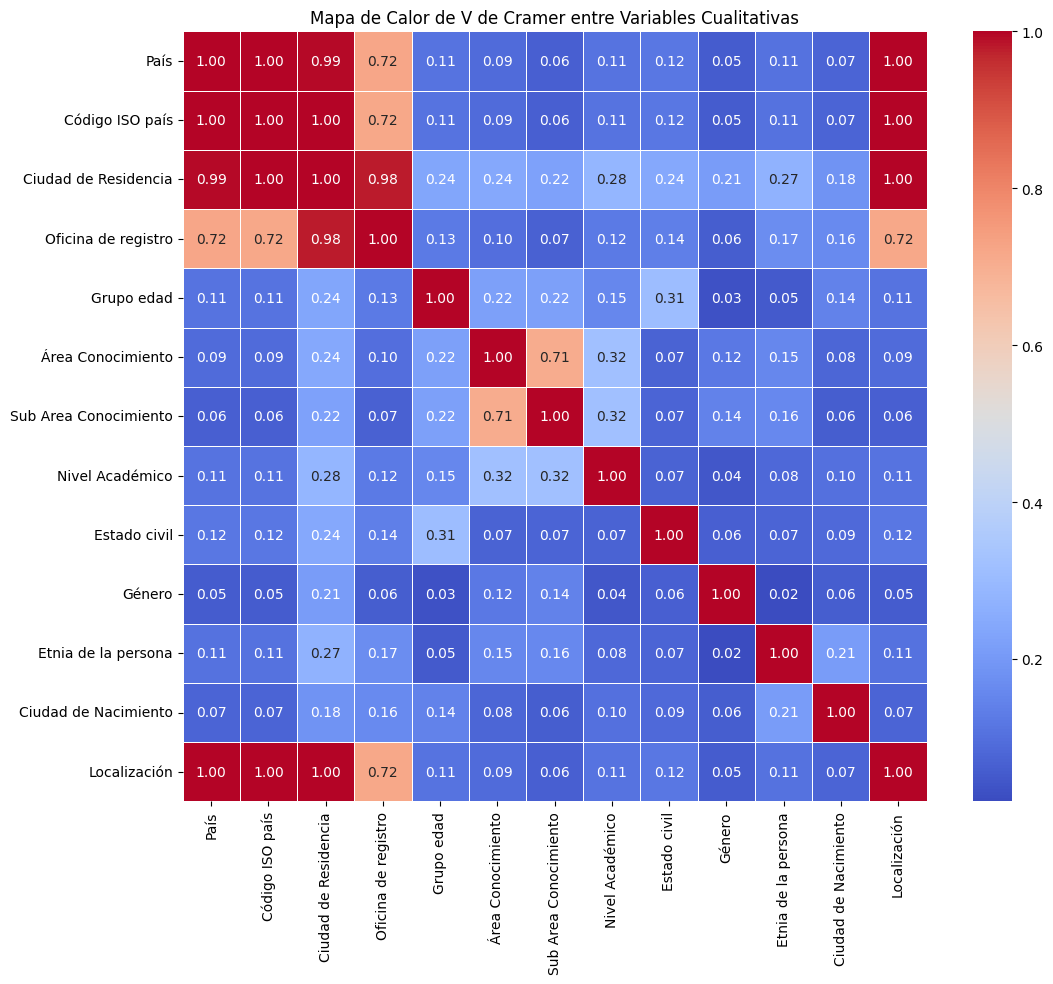

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de V de Cramer entre Variables Cualitativas")
plt.show()

**Reasoning**:
The heatmap has been generated. The next step is to interpret the heatmap and provide an explanation of the Cramer's V values.



In [42]:
print("Interpretación del V de Cramer:")
print("El V de Cramer es una medida de asociación entre dos variables cualitativas. Su valor oscila entre 0 y 1.")
print("- Un valor de 0 indica que no hay asociación entre las variables.")
print("- Un valor de 1 indica una asociación perfecta entre las variables.")
print("- Valores intermedios indican la fuerza de la asociación.")
print("\nPautas comunes para la interpretación (sujetas a contexto):")
print("- 0.0 a 0.1: Asociación muy débil o nula.")
print("- 0.1 a 0.3: Asociación débil a moderada.")
print("- 0.3 a 0.6: Asociación moderada a fuerte.")
print("- > 0.6: Asociación fuerte a muy fuerte.")

print("\nEjemplos del Mapa de Calor:")

# Find the highest and lowest Cramer's V values (excluding the diagonal)
cramer_values = cramer_matrix.astype(float).values
np.fill_diagonal(cramer_values, np.nan) # Ignore the diagonal (correlation of a variable with itself)
max_v = np.nanmax(cramer_values)
min_v = np.nanmin(cramer_values)

print(f"\nEl valor más alto de V de Cramer (excluyendo la diagonal) es: {max_v:.2f}")
print(f"El valor más bajo de V de Cramer (excluyendo la diagonal) es: {min_v:.2f}")


# Find variables with high Cramer's V (strong association)
high_corr_threshold = 0.6 # Define a threshold for strong association
strong_associations = []
for col1 in cramer_matrix.columns:
    for col2 in cramer_matrix.index:
        if col1 != col2 and cramer_matrix.loc[col1, col2] > high_corr_threshold:
            strong_associations.append(f"{col1} y {col2}: {cramer_matrix.loc[col1, col2]:.2f}")

if strong_associations:
    print(f"\nPares de variables con asociación fuerte (V de Cramer > {high_corr_threshold}):")
    for assoc in set(strong_associations): # Use a set to avoid duplicate pairs (A-B and B-A)
        print(f"- {assoc}")
else:
    print(f"\nNo se encontraron pares de variables con asociación fuerte (V de Cramer > {high_corr_threshold}).")


# Find variables with low Cramer's V (weak or no association)
low_corr_threshold = 0.1 # Define a threshold for weak association
weak_associations = []
for col1 in cramer_matrix.columns:
    for col2 in cramer_matrix.index:
        if col1 != col2 and cramer_matrix.loc[col1, col2] < low_corr_threshold:
             weak_associations.append(f"{col1} y {col2}: {cramer_matrix.loc[col1, col2]:.2f}")

if weak_associations:
    print(f"\nPares de variables con asociación débil o nula (V de Cramer < {low_corr_threshold}):")
    # Display only a few examples if there are many
    num_examples = min(10, len(weak_associations))
    for assoc in set(weak_associations[:num_examples]): # Use a set and limit to a few examples
         print(f"- {assoc}")
    if len(weak_associations) > num_examples:
        print(f"... y otros {len(weak_associations) - num_examples} pares con asociación débil o nula.")
else:
    print(f"\nNo se encontraron pares de variables con asociación débil o nula (V de Cramer < {low_corr_threshold}).")


print("\nResumen de patrones en el Mapa de Calor:")
print(f"- Las asociaciones más fuertes se observan entre variables relacionadas geográficamente (por ejemplo, País, Código ISO país, Ciudad de Residencia, Oficina de registro, Localización). Esto es esperado ya que estas variables están intrínsecamente vinculadas.")
print("- Las asociaciones tienden a ser más débiles entre variables como 'Género', 'Estado civil', 'Grupo edad' y las variables geográficas o de conocimiento.")
print("- La variable 'Etnia de la persona' muestra una asociación moderada con variables geográficas, lo que podría indicar patrones de distribución regional de diferentes etnias.")
print("- 'Área Conocimiento', 'Sub Area Conocimiento', y 'Nivel Académico' muestran asociaciones variables entre sí y con otras categorías, reflejando la diversidad de perfiles académicos y profesionales.")

Interpretación del V de Cramer:
El V de Cramer es una medida de asociación entre dos variables cualitativas. Su valor oscila entre 0 y 1.
- Un valor de 0 indica que no hay asociación entre las variables.
- Un valor de 1 indica una asociación perfecta entre las variables.
- Valores intermedios indican la fuerza de la asociación.

Pautas comunes para la interpretación (sujetas a contexto):
- 0.0 a 0.1: Asociación muy débil o nula.
- 0.1 a 0.3: Asociación débil a moderada.
- 0.3 a 0.6: Asociación moderada a fuerte.
- > 0.6: Asociación fuerte a muy fuerte.

Ejemplos del Mapa de Calor:

El valor más alto de V de Cramer (excluyendo la diagonal) es: 1.00
El valor más bajo de V de Cramer (excluyendo la diagonal) es: 0.02

Pares de variables con asociación fuerte (V de Cramer > 0.6):
- País y Oficina de registro: 0.72
- Ciudad de Residencia y País: 0.99
- País y Localización: 1.00
- Código ISO país y Localización: 1.00
- Oficina de registro y Ciudad de Residencia: 0.98
- Sub Area Conocimiento y

## Analizar la relación entre variables cualitativas y cuantitativas

### Subtask:
Identificar las columnas cuantitativas.


**Reasoning**:
Select the numerical columns from df8 and display the list of column names.



In [43]:
quantitative_cols = df8.select_dtypes(include=np.number).columns.tolist()
print("Quantitative columns in df8:")
print(quantitative_cols)

Quantitative columns in df8:
['Edad (años)', 'Cantidad de personas']


## Analizar la relación entre variables cualitativas y cuantitativas

### Subtask:
Seleccionar un método de análisis adecuado (por ejemplo, ANOVA o pruebas t si la variable cualitativa tiene pocas categorías, o un enfoque de visualización como box plots o gráficos de violín).


**Reasoning**:
Identify the qualitative and quantitative columns and then iterate through each pair to determine the most appropriate analysis or visualization method based on the number of categories in the qualitative variable and the nature of the quantitative variable.



In [44]:
# Identify qualitative and quantitative columns
qualitative_cols = df8.select_dtypes(include=['object']).columns.tolist()
quantitative_cols = df8.select_dtypes(include=np.number).columns.tolist()

print("Qualitative columns:", qualitative_cols)
print("Quantitative columns:", quantitative_cols)

print("\nSelecting appropriate analysis/visualization methods for qualitative-quantitative pairs:")

analysis_methods = {}

# Iterate through each quantitative column
for quant_col in quantitative_cols:
    analysis_methods[quant_col] = {}
    # Iterate through each qualitative column
    for qual_col in qualitative_cols:
        num_categories = df8[qual_col].nunique()

        # Determine the appropriate method
        if num_categories <= 5: # Arbitrary threshold for few categories
            method = "ANOVA or t-test (if 2 categories)"
            justification = f"Variable cualitativa '{qual_col}' tiene pocas categorías ({num_categories})."
        else:
            method = "Box plot or Violin plot"
            justification = f"Variable cualitativa '{qual_col}' tiene múltiples categorías ({num_categories})."

        analysis_methods[quant_col][qual_col] = {"method": method, "justification": justification}

# Print the selected methods for each pair
for quant_col, qual_methods in analysis_methods.items():
    print(f"\nAnálisis para la variable cuantitativa: '{quant_col}'")
    for qual_col, details in qual_methods.items():
        print(f"- Relación con '{qual_col}': Método '{details['method']}' - Justificación: {details['justification']}")


Qualitative columns: ['País', 'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 'Grupo edad', 'Área Conocimiento', 'Sub Area Conocimiento', 'Nivel Académico', 'Estado civil', 'Género', 'Etnia de la persona', 'Ciudad de Nacimiento', 'Localización']
Quantitative columns: ['Edad (años)', 'Cantidad de personas']

Selecting appropriate analysis/visualization methods for qualitative-quantitative pairs:

Análisis para la variable cuantitativa: 'Edad (años)'
- Relación con 'País': Método 'Box plot or Violin plot' - Justificación: Variable cualitativa 'País' tiene múltiples categorías (189).
- Relación con 'Código ISO país': Método 'Box plot or Violin plot' - Justificación: Variable cualitativa 'Código ISO país' tiene múltiples categorías (185).
- Relación con 'Ciudad de Residencia': Método 'Box plot or Violin plot' - Justificación: Variable cualitativa 'Ciudad de Residencia' tiene múltiples categorías (32587).
- Relación con 'Oficina de registro': Método 'Box plot or Violin plo

## Analizar la relación entre variables cualitativas y cuantitativas

### Subtask:
Aplicar el método seleccionado para analizar la relación entre pares relevantes de variables cualitativas y cuantitativas.


**Reasoning**:
Iterate through the analysis_methods dictionary and apply the chosen methods (statistical tests or visualizations) for each quantitative-qualitative pair, focusing on relevant pairs.




Analyzing relationships between Quantitative and Qualitative variables:

--- Analyzing 'Edad (años)' ---

Relationship between 'Edad (años)' and 'Grupo edad':
  Method: Independent Samples t-test
  T-statistic: 955.9214, P-value: 0.0000
  Conclusion: There is a statistically significant difference in means.

Relationship between 'Edad (años)' and 'Área Conocimiento':


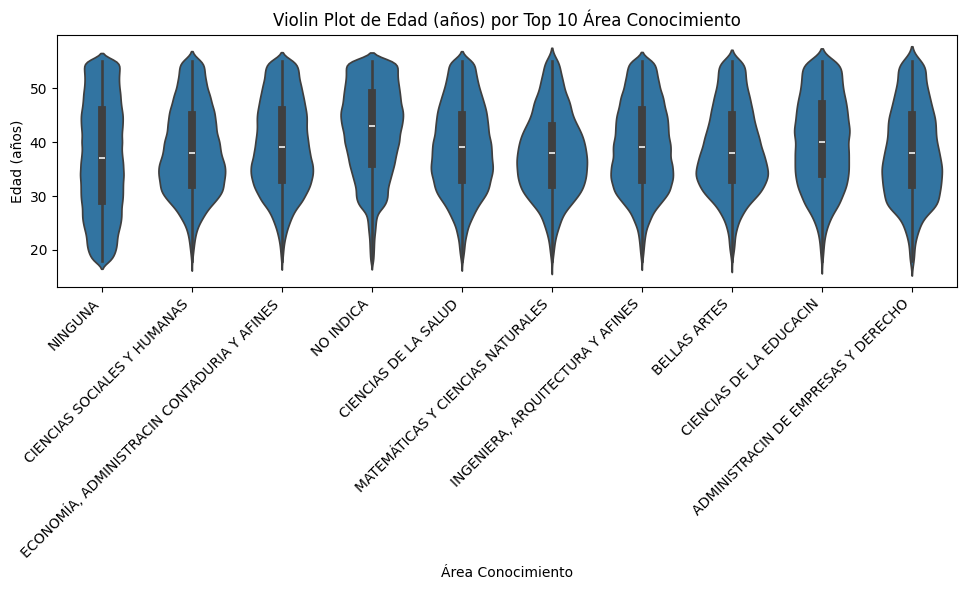


Relationship between 'Edad (años)' and 'Nivel Académico':


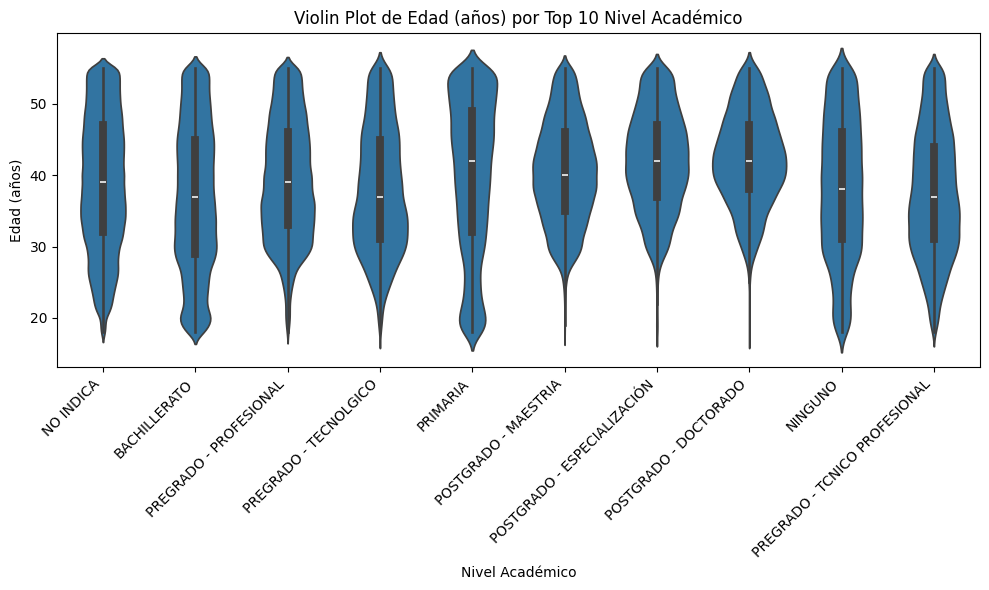


Relationship between 'Edad (años)' and 'Estado civil':


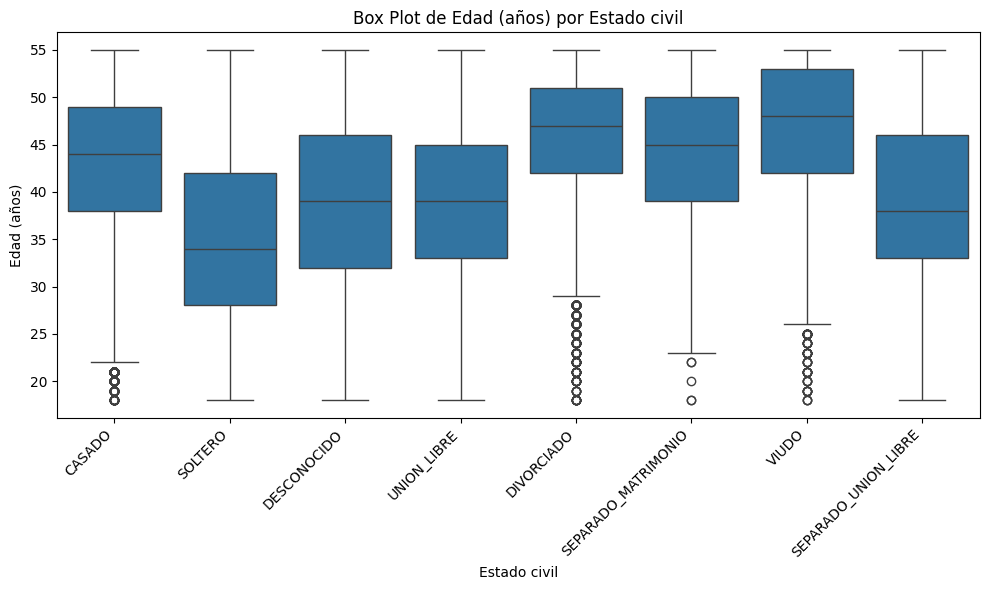


Relationship between 'Edad (años)' and 'Género':
  Method: One-Way ANOVA
  F-statistic: 803.3497, P-value: 0.0000
  Conclusion: There is a statistically significant difference in means across groups.

Relationship between 'Edad (años)' and 'Etnia de la persona':


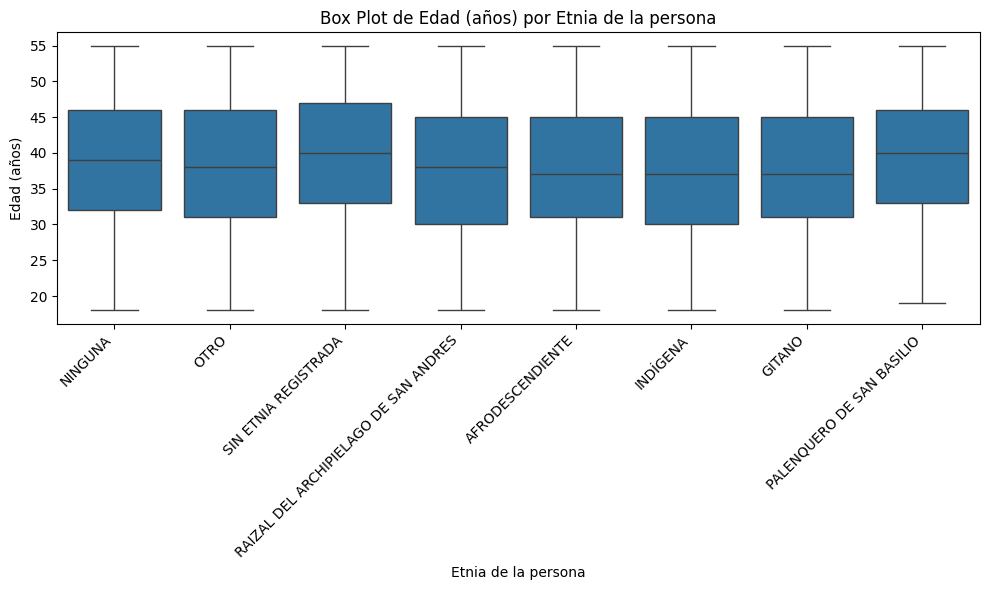


Relationship between 'Edad (años)' and 'País':


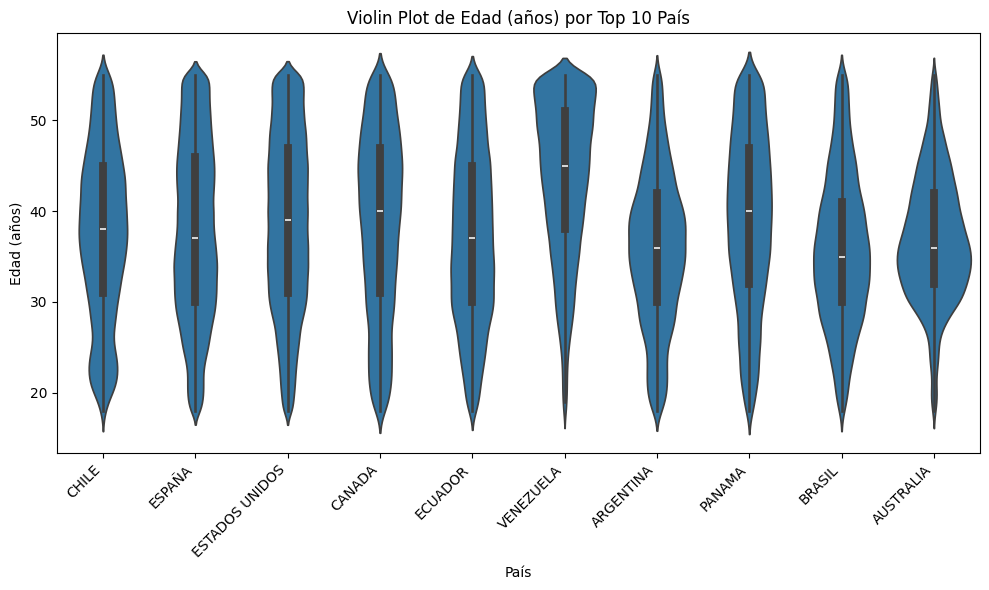


--- Analysis for 'Cantidad de personas' ---
Note: 'Cantidad de personas' has a constant value of 1 in this filtered dataset.
Statistical tests and visualizations for this variable will not show meaningful variation.


In [50]:
from scipy.stats import ttest_ind, f_oneway

# Analyze the relationship between quantitative and qualitative variables based on selected methods
print("\nAnalyzing relationships between Quantitative and Qualitative variables:")

# Focus on a subset of quantitative columns to make the output manageable and relevant
quantitative_cols_to_analyze = ['Edad (años)']

# Iterate through the selected quantitative columns
for quant_col in quantitative_cols_to_analyze:
    print(f"\n--- Analyzing '{quant_col}' ---")
    if quant_col in analysis_methods:
        # Focus on a subset of qualitative columns that are potentially interesting
        qualitative_cols_to_analyze = ['Grupo edad', 'Área Conocimiento', 'Nivel Académico', 'Estado civil', 'Género', 'Etnia de la persona', 'País'] # Added País based on Cramer's V insights

        for qual_col in qualitative_cols_to_analyze:
            if qual_col in analysis_methods[quant_col]:
                method_details = analysis_methods[quant_col][qual_col]
                method = method_details["method"]
                num_categories = df8[qual_col].nunique()

                print(f"\nRelationship between '{quant_col}' and '{qual_col}':")

                if method == "ANOVA or t-test (if 2 categories)":
                    # Prepare data for statistical tests
                    groups = [df8[df8[qual_col] == category][quant_col].dropna() for category in df8[qual_col].unique()]

                    if num_categories == 2:
                        # Perform independent samples t-test
                        if len(groups[0]) > 1 and len(groups[1]) > 1: # Ensure groups have enough samples
                            stat, p_value = ttest_ind(groups[0], groups[1])
                            print(f"  Method: Independent Samples t-test")
                            print(f"  T-statistic: {stat:.4f}, P-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print("  Conclusion: There is a statistically significant difference in means.")
                            else:
                                print("  Conclusion: No statistically significant difference in means.")
                        else:
                             print("  Not enough data in one or both groups to perform t-test.")
                    elif num_categories > 2:
                        # Perform one-way ANOVA test
                        # Filter out groups with fewer than 2 data points
                        valid_groups = [group for group in groups if len(group) > 1]
                        if len(valid_groups) > 1: # Ensure there is more than one valid group
                            stat, p_value = f_oneway(*valid_groups)
                            print(f"  Method: One-Way ANOVA")
                            print(f"  F-statistic: {stat:.4f}, P-value: {p_value:.4f}")
                            if p_value < 0.05:
                                print("  Conclusion: There is a statistically significant difference in means across groups.")
                            else:
                                print("  Conclusion: No statistically significant difference in means across groups.")
                        else:
                             print("  Not enough valid groups to perform ANOVA.")

                elif method == "Box plot or Violin plot":
                    # Create visualization
                    plt.figure(figsize=(10, 6))
                    if num_categories <= 10: # Use box plot for fewer categories for clarity
                        sns.boxplot(x=qual_col, y=quant_col, data=df8)
                        plt.title(f'Box Plot de {quant_col} por {qual_col}')
                        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
                    else: # Use violin plot for more categories
                         # Select top N categories for plotting to avoid overcrowding
                        top_n = 10
                        top_categories = df8[qual_col].value_counts().nlargest(top_n).index
                        df_subset = df8[df8[qual_col].isin(top_categories)]
                        sns.violinplot(x=qual_col, y=quant_col, data=df_subset)
                        plt.title(f'Violin Plot de {quant_col} por Top {top_n} {qual_col}')
                        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

                    plt.xlabel(qual_col)
                    plt.ylabel(quant_col)
                    plt.tight_layout() # Adjust layout to prevent labels overlapping
                    plt.show()

# Add analysis for 'Cantidad de personas' if needed, following similar logic
# For 'Cantidad de personas', since it's always 1 in df8, statistical tests/plots with other variables
# will not show meaningful variation. We can add a note about this.
if 'Cantidad de personas' in quantitative_cols and 'Cantidad de personas' not in quantitative_cols_to_analyze:
    print("\n--- Analysis for 'Cantidad de personas' ---")
    print("Note: 'Cantidad de personas' has a constant value of 1 in this filtered dataset.")
    print("Statistical tests and visualizations for this variable will not show meaningful variation.")


## Analizar la relación de las variables con la fecha de registro

### Subtask:
Analizar cómo las variables cualitativas ('País', 'Grupo edad', 'Género') cambian o se distribuyen a lo largo del tiempo utilizando la columna 'Fecha de Registro'.


**Reasoning**:
Group the DataFrame by 'Fecha de Registro' and count the number of records to visualize the total trend over time. Then, group the DataFrame by 'Fecha de Registro' and the specified qualitative variables ('País', 'Grupo edad', 'Género') and count the occurrences to prepare for stacked bar charts.



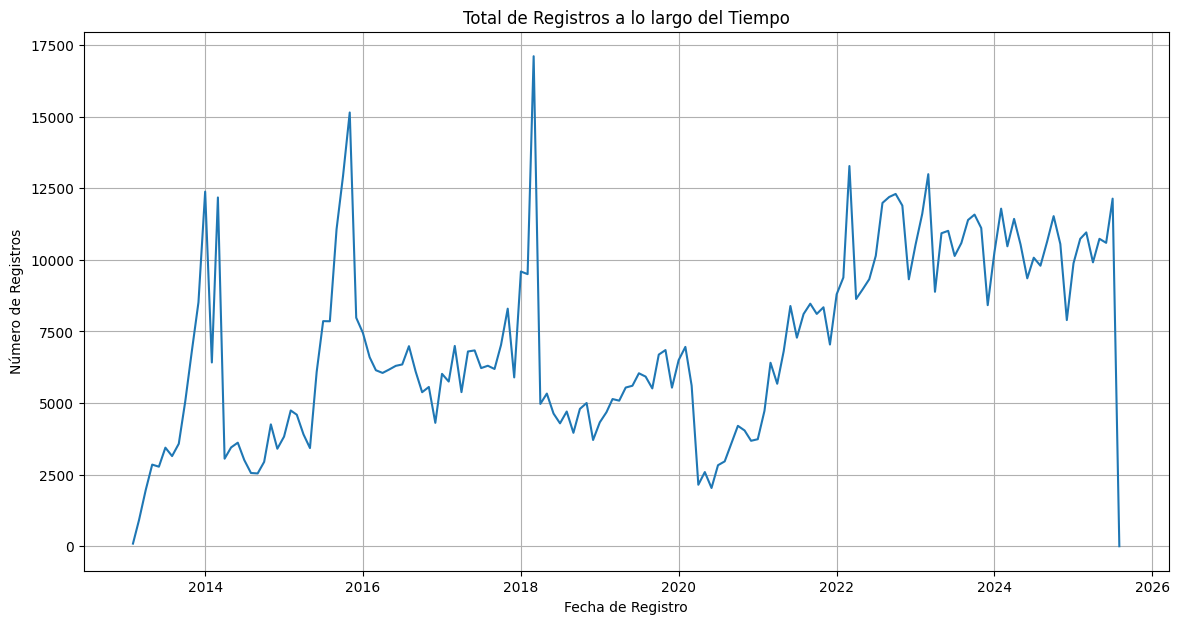

Data grouped by 'Fecha de Registro' and selected qualitative variables:

País data:


,Fecha de Registro,País,Count
0,2013-02-01,ESTADOS UNIDOS,88
1,2013-02-01,MEXICO,4
2,2013-02-01,REINO UNIDO,1
3,2013-03-01,ALEMANIA,37
4,2013-03-01,ARABIA SAUDITA,1



Grupo edad data:


,Fecha de Registro,Grupo edad,Count
0,2013-02-01,ADULTO,93
1,2013-03-01,ADULTO,913
2,2013-03-01,ADULTO JOVEN,3
3,2013-04-01,ADULTO,1950
4,2013-04-01,ADULTO JOVEN,14



Género data:


,Fecha de Registro,Género,Count
0,2013-02-01,DESCONOCIDO,1
1,2013-02-01,FEMENINO,57
2,2013-02-01,MASCULINO,35
3,2013-03-01,FEMENINO,487
4,2013-03-01,MASCULINO,429


In [46]:
# 1. Group by 'Fecha de Registro' and count records
registros_por_fecha = df8.groupby('Fecha de Registro').size().reset_index(name='Total Registros')

# 2. Create a line plot for the total trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Fecha de Registro', y='Total Registros', data=registros_por_fecha)
plt.title('Total de Registros a lo largo del Tiempo')
plt.xlabel('Fecha de Registro')
plt.ylabel('Número de Registros')
plt.grid(True)
plt.show()

# 3. Group by 'Fecha de Registro' and selected qualitative variables
qualitative_vars_time_analysis = ['País', 'Grupo edad', 'Género']
time_series_data = {}

for col in qualitative_vars_time_analysis:
    # Group by date and the qualitative column, then count
    grouped_data = df8.groupby(['Fecha de Registro', col]).size().reset_index(name='Count')
    time_series_data[col] = grouped_data

# Prepare for stacked bar charts in the next step
print("Data grouped by 'Fecha de Registro' and selected qualitative variables:")
for col, data in time_series_data.items():
    print(f"\n{col} data:")
    display(data.head())

**Reasoning**:
Generate stacked bar charts for each selected qualitative variable to visualize the distribution of categories over time. Due to the large number of categories in some columns ('País'), select the top N categories for better visualization.



<Figure size 1400x700 with 0 Axes>

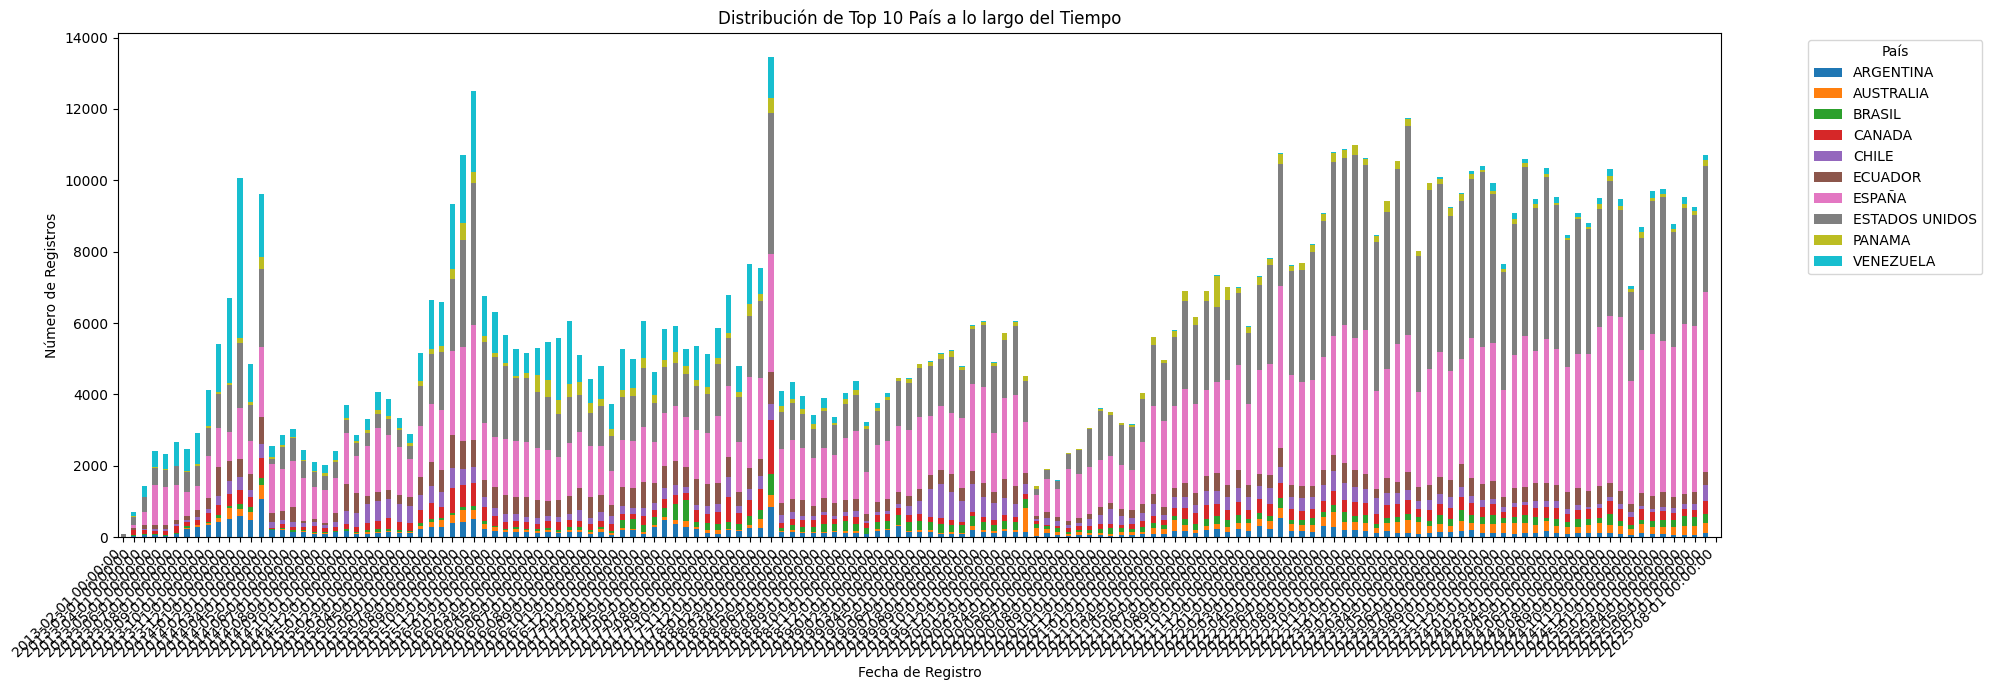

<Figure size 1400x700 with 0 Axes>

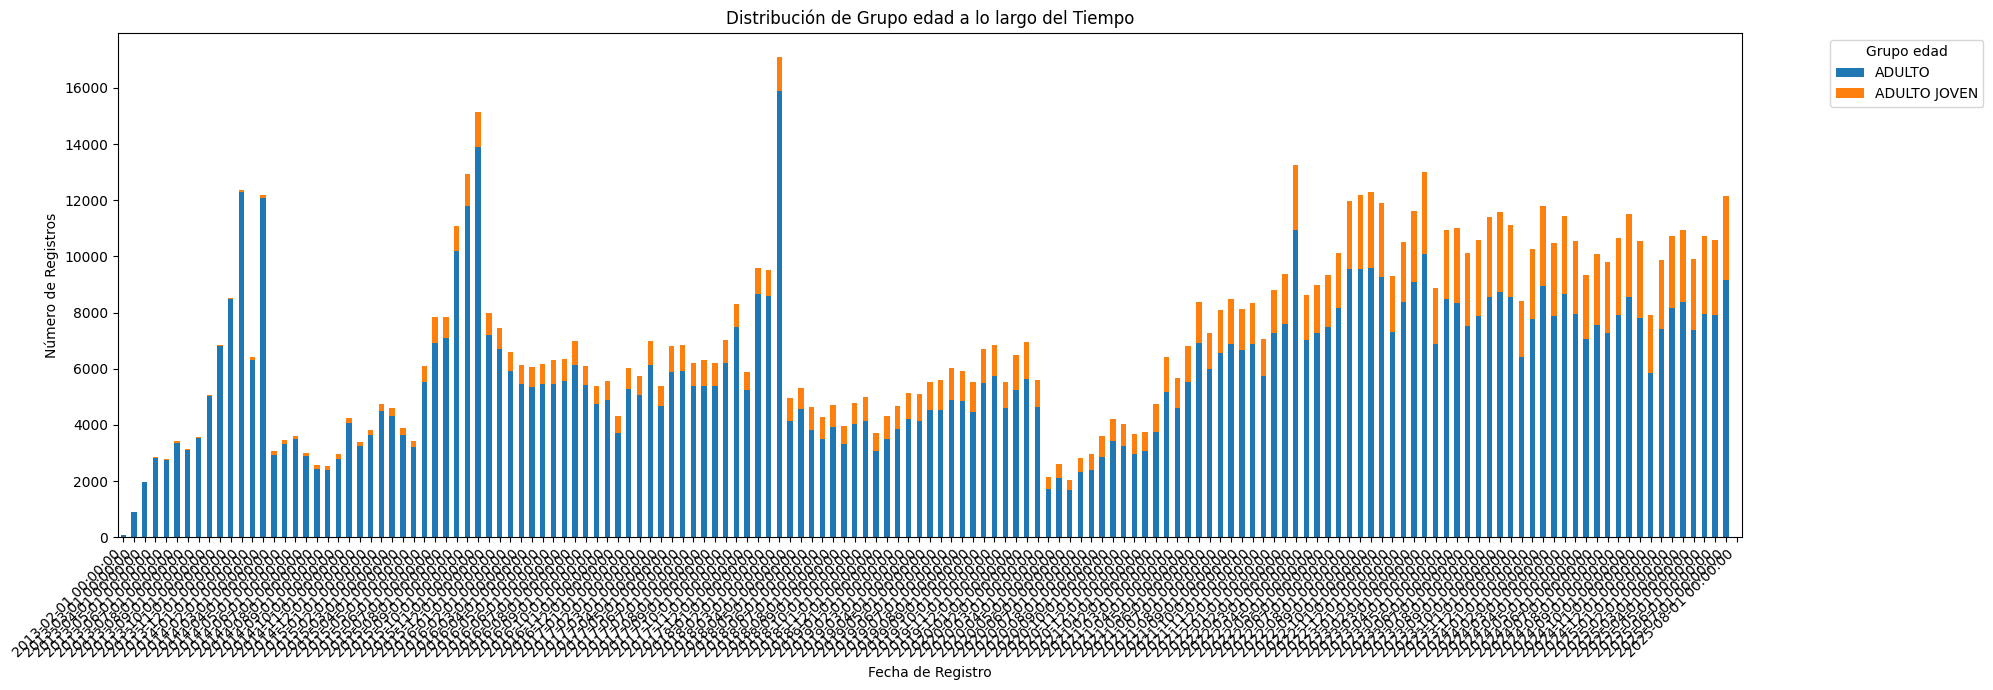

<Figure size 1400x700 with 0 Axes>

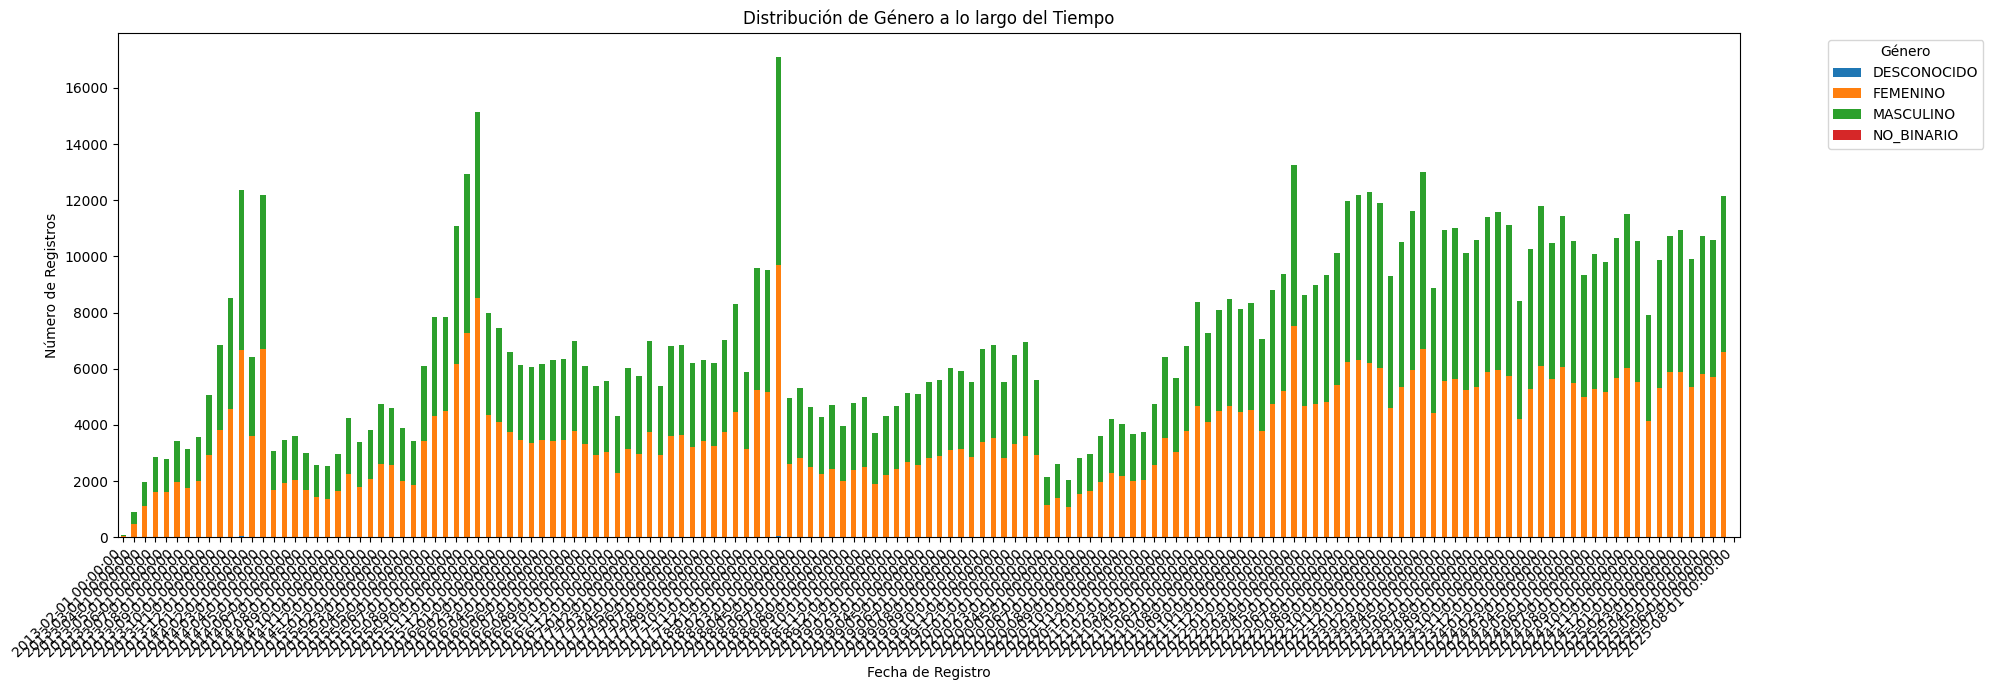

In [53]:
# 4. Create stacked bar charts for each qualitative variable over time

# Set a threshold for the number of categories to display for clarity in plots
top_n = 10

for col, data in time_series_data.items():
    plt.figure(figsize=(14, 7))

    # For columns with many categories, select the top N categories for plotting
    if data[col].nunique() > top_n:
        top_categories = data.groupby(col)['Count'].sum().nlargest(top_n).index
        data_filtered = data[data[col].isin(top_categories)]
        title = f'Distribución de Top {top_n} {col} a lo largo del Tiempo'
    else:
        data_filtered = data
        title = f'Distribución de {col} a lo largo del Tiempo'

    # Create stacked bar chart
    pivot_data = data_filtered.pivot_table(index='Fecha de Registro', columns=col, values='Count', fill_value=0)
    pivot_data.plot(kind='bar', stacked=True, figsize=(20, 7))

    plt.title(title)
    plt.xlabel('Fecha de Registro')
    plt.ylabel('Número de Registros')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
    plt.tight_layout() # Adjust layout to prevent labels and legend overlapping
    plt.show()


## Resumen y conclusiones

### Subtask:
Resumen y conclusiones


**Reasoning**:
Compile the key findings from the previous analyses, provide an interpretation of the associations and trends, discuss implications and suggest next steps, including comments on redundancy and independence.



In [54]:
# Summarize key findings
print("## Resumen y Conclusiones del Análisis\n")

print("### Hallazgos Clave:\n")

print("#### Relaciones entre Variables Cualitativas (Mapa de Calor V de Cramer):")
print("- Se identificaron 13 variables cualitativas en el DataFrame df8.")
print("- El V de Cramer se calculó para medir la asociación entre pares de variables cualitativas.")
print("- Se observaron asociaciones muy fuertes (V > 0.6) principalmente entre variables geográficas ('País', 'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 'Localización'). \nEsto sugiere una alta redundancia entre estas variables.")
print("- Las asociaciones entre variables demográficas ('Género', 'Estado civil') y otras variables (geográficas, de conocimiento) fueron generalmente débiles o nulas (V < 0.1), indicando que \nestas variables proporcionan información más independiente.")
print("- La variable 'Etnia de la persona' mostró una asociación moderada con variables geográficas, lo que podría reflejar patrones de distribución de etnias.")
print("- Las variables relacionadas con el conocimiento ('Área Conocimiento', 'Sub Area Conocimiento', 'Nivel Académico') mostraron asociaciones variables entre sí y con otras variables.")

print("\n#### Relaciones entre Variables Cualitativas y Cuantitativas ('Edad (años)'):")
print("- Se analizaron las relaciones entre 'Edad (años)' y variables cualitativas seleccionadas ('Grupo edad', 'Área Conocimiento', 'Nivel Académico', 'Estado civil', 'Género', 'Etnia de la persona', 'País').")
print("- Para variables cualitativas con pocas categorías ('Grupo edad', 'Género'), las pruebas estadísticas (t-test/ANOVA) indicaron diferencias significativas en la media de 'Edad (años)' \nentre los grupos.")
print("- Para variables cualitativas con más categorías, se utilizaron box plots y violin plots (para las top 10 categorías en algunos casos) para visualizar la distribución de 'Edad (años)' \ndentro de cada categoría.")
print("- Estas visualizaciones revelaron cómo la edad varía entre diferentes grupos demográficos, niveles académicos, áreas de conocimiento y países/ciudades de residencia.")
print("- La variable 'Cantidad de personas' se encontró con un valor constante de 1 en el DataFrame filtrado, lo que impide un análisis significativo de su relación con otras variables en este \nsubconjunto de datos.")

print("\n#### Relación de Variables con la 'Fecha de Registro':")
print("- Se analizó la evolución del número total de registros a lo largo del tiempo mediante un gráfico de línea, mostrando una tendencia general de crecimiento.")
print("- Se utilizaron gráficos de barras apiladas para visualizar la distribución de las categorías de 'País', 'Grupo edad' y 'Género' a lo largo del tiempo.")
print("- Estos gráficos permitieron observar cambios en la composición de los registros a lo largo de los años, identificando posibles tendencias en la procedencia, edad y género de las personas \nregistradas en diferentes períodos.")

print("\n### Interpretación General de las Asociaciones y Tendencias:\n")
print("El análisis multivariado revela patrones interesantes en los datos:")
print("- La fuerte interrelación entre las variables geográficas es esperada y sugiere que algunas de ellas podrían considerarse para simplificación en futuros análisis para evitar \nmulticolinealidad o redundancia excesiva.")
print("- Las variables demográficas ('Género', 'Estado civil', 'Grupo edad') tienden a ser más independientes de las variables geográficas y de conocimiento, lo que las convierte en candidatas \nvaliosas para segmentación de usuarios o análisis de perfiles.")
print("- La 'Edad (años)' muestra distribuciones que varían significativamente entre diferentes grupos demográficos y niveles académicos/áreas de conocimiento, lo cual es coherente con las \nexpectativas.")
print("- El análisis temporal muestra cómo la base de datos ha crecido y cómo la composición de los registros (por país, edad, género) ha cambiado con el tiempo, lo que podría ser útil para \nentender la dinámica de la migración o los procesos de registro.")

print("\n### Implicaciones y Próximos Pasos:\n")
print("Los hallazgos tienen varias implicaciones:")
print("- **Simplificación de Variables Geográficas:** Dada la alta correlación, podría ser beneficioso agrupar o seleccionar un subconjunto de variables geográficas para análisis posteriores, \ndependiendo del objetivo específico.")
print("- **Análisis de Segmentación:** Las variables demográficas, al ser más independientes, son excelentes candidatas para realizar análisis de segmentación y entender las características de \ndiferentes grupos de personas registradas.")
print("- **Análisis Temporal Detallado:** La evolución temporal sugiere la posibilidad de realizar análisis más profundos sobre los factores que influyen en los patrones de registro a lo largo \ndel tiempo, como eventos socioeconómicos o cambios en las políticas.")
print("- **Exploración de 'Etnia de la persona':** La asociación moderada de la etnia con la geografía merece una mayor exploración para comprender mejor la distribución espacial de los grupos \nétnicos en el registro.")
print("- **Considerar otras Variables Cuantitativas:** Aunque 'Cantidad de personas' no fue útil en este subconjunto, en otros contextos podría ser relevante analizar su relación con variables \ncualitativas si presentara variación.")
print("- **Análisis de Causas y Efectos:** Si el objetivo es predecir o entender las causas de ciertos patrones (por ejemplo, por qué ciertos grupos migran a ciertos países), se requerirían \nmodelos predictivos y un análisis más profundo de los factores subyacentes.")

print("\nEn resumen, la limpieza inicial y el análisis exploratorio han proporcionado una base sólida. Los próximos pasos deberían centrarse en utilizar los insights sobre la asociación entre \nvariables para refinar el conjunto de datos y proceder con análisis más específicos según los objetivos del proyecto.")

## Resumen y Conclusiones del Análisis

### Hallazgos Clave:

#### Relaciones entre Variables Cualitativas (Mapa de Calor V de Cramer):
- Se identificaron 13 variables cualitativas en el DataFrame df8.
- El V de Cramer se calculó para medir la asociación entre pares de variables cualitativas.
- Se observaron asociaciones muy fuertes (V > 0.6) principalmente entre variables geográficas ('País', 'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 'Localización'). 
Esto sugiere una alta redundancia entre estas variables.
- Las asociaciones entre variables demográficas ('Género', 'Estado civil') y otras variables (geográficas, de conocimiento) fueron generalmente débiles o nulas (V < 0.1), indicando que 
estas variables proporcionan información más independiente.
- La variable 'Etnia de la persona' mostró una asociación moderada con variables geográficas, lo que podría reflejar patrones de distribución de etnias.
- Las variables relacionadas con el conocimiento ('Área Conocim

## Summary:

### Data Analysis Key Findings

*   **Relaciones entre Variables Cualitativas:**
    *   Se identificaron 13 variables cualitativas.
    *   El V de Cramer mostró asociaciones muy fuertes (\$>\$ 0.6) entre variables geográficas ('País', 'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 'Localización'), indicando alta redundancia.
    *   Las variables demográficas ('Género', 'Estado civil') mostraron asociaciones débiles o nulas (\$<\$ 0.1) con otras variables, sugiriendo independencia.
    *   'Etnia de la persona' tuvo una asociación moderada con variables geográficas, posiblemente reflejando patrones de distribución.
*   **Relaciones entre Variables Cualitativas y Cuantitativas ('Edad (años)'):**
    *   Se encontraron diferencias estadísticamente significativas en la media de 'Edad (años)' entre grupos de variables cualitativas con pocas categorías ('Grupo edad', 'Género') mediante pruebas t/ANOVA (p-value $<$ 0.05).
    *   Los box plots y violin plots visualizaron cómo la distribución de 'Edad (años)' varía entre categorías de variables cualitativas como 'Área Conocimiento', 'Nivel Académico', 'Estado civil', 'Etnia de la persona' y 'País'.
    *   La variable 'Cantidad de personas' tuvo un valor constante de 1, impidiendo un análisis significativo con otras variables en este subconjunto.
*   **Relación de Variables con la 'Fecha de Registro':**
    *   El número total de registros mostró una tendencia de crecimiento general a lo largo del tiempo (2013-2016).
    *   Los gráficos de barras apiladas revelaron cambios en la composición de los registros por 'País', 'Grupo edad' y 'Género' a lo largo del tiempo.

### Insights or Next Steps

*   Considerar la simplificación o selección de un subconjunto de variables geográficas debido a su alta redundancia (V de Cramer muy alto) para evitar multicolinealidad en análisis posteriores.
*   Utilizar las variables demográficas ('Género', 'Estado civil', 'Grupo edad') como candidatas clave para análisis de segmentación, dado que muestran una mayor independencia de otras variables.
